<a href="https://colab.research.google.com/github/joaopedro-1/Controle-e-Automacao/blob/main/ED_ControleAutomacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

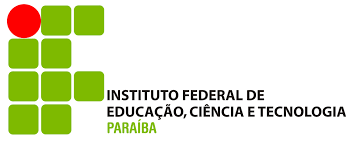

<center>

INSTITUTO FEDERAL DE CIÊNCIA E TECNOLOGIA DA PARAÍBA

CAMPUS CAMPINA GRANDE

BACHARELADO EM ENGENHARIA DA COMPUTAÇÃO

DISCIPLINA: CONTROLE E AUTOMAÇÃO

PROFESSOR: MOACY PEREIRA DA SILVA

<center>

<br>
<br>
<br>

**ESTUDO DIRIGIDO DA DISCIPLINA: CONTROLE E AUTOMAÇÃO**

<br>
<br>
<br>

Icaro Mendes de Alcantara Bezerra <br>
Joao Pedro de Lima e Silva

<center>

<br>
<br>
<br>

24 de favereiro de 2025 <br>
Campina Grande, PB

In [ ]:
!pip install control
!pip install tclab
from control import *
from control.matlab import *
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import signal
import control as ctrl
import control as ctl
from scipy.signal import TransferFunction, impulse


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.7 MB/s eta 0:00:00


## Capítulo 4: Características de sistemas de controle com retroação

## 4.1 Sistemas de controle a malha aberta e a malha fechada

Os sistemas de controle podem ser de dois tipos: de malha aberta ou de malha fechada. Os sistemas de controle de malha fechada são aqueles sistemas que possuem retroação: quando em um sistema cuja resposta **desejada** é conhecida é gerado um sinal proporcional ao erro entre essa resposta e a resposta real do sistema, e esse sinal é utilizado para controlar o processo. A retroação também é chamada de realimentação. Já os sistemas de malha aberta são os sistemas que não possuem retroação.

O diagrama abaixo representa um sistema de malha fechada:

![picture](https://drive.google.com/uc?export=view&id=1NpkYNNJ4e9q7bMMCV6fpIXS8SuyRAu3z)

O sinal de erro do sistema acima pode ser escrito por:

$$E(s) = \frac{1}{1+G(s)}R(s)$$

##4.2 Sensibilidade de sistemas de controle a variações de parâmetros


Um sistema qualquer, independente de sua finalidade, está sujeito a experienciar mudanças no seu comportamento, causadas por fatores naturais, como envelhecimento, mudança das condições ambientais, perda de valores etc. Entretanto, um sistema de malha fechada é menos sensível a essas mudanças, uma vez que a a retroação procura corrigir a saída.

A sensibilidade do sistema de malha aberta é definida por:
$$S=\frac{\frac{\Delta T(s)}{T(s)}}{\frac{\Delta G(s)}{G(s)}}$$

Onde $T(s)$ é a função de transferência do sistema de malha aberta, definida por:
$$T(s) =\frac{Y(s)}{R(s)}$$

Já a sensibilidade do sistema de malha fechada é definida por:
$$S^T_G=\frac{1}{1+G(s)H(s)}$$

Onde $T(s)$ é a função de transferência do sistema de malha fechada, definida por:
$$T(s) = \frac{G(s)}{1+GH(s)}$$

A vantagem de se ter sistemas de controle com retroação está exatamente na capacidade de reduzir esse efeito de mudanças no seu comportamento.

##4.3 Controle da resposta transitória de sistemas de controle

A resposta transitória de um sistema de controle é o tempo de resposta de um sistema a um estímulo, ou seja, é o tempo que o sistema leva para alcançar o seu valor final, dada uma entrada qualquer.

Manter um controle adequado dessa resposta transitória é muito importante, uma vez que os sistemas de controle objetivam fornecer uma resposta desejada. Deste modo, a resposta transitória deve ser ajustada até que esteja aceitável.

Em sistemas de controle de malha aberta, esse ajuste pode ser obtido através da inserção de controladores em cascata, imediatamente anteriores ao processo do sistema. Já em sistemas de malha fechada, esse ajuste pode ser obtido através dos parâmetros da malha de retroação.

##4.4 Sinais de perturbação em um sistema de controle com retroação

Os sinais de perturbação, também chamados de ruído, são sinais de entrada indesejados que interferem no resultado do sistema, fazendo com que este forneça uma saída não exata.

Muitos sistemas de controle estão susceptíveis a receber interferência de ruídos diversos, mas os sistemas de malha fechada são capazes de dirimir com eficiência boa parte desses ruídos.

##4.5 Erro de estado estacionário

Sabemos que existe um tempo entre um estímulo de um sistema e a sua estabilização no seu valor final, e que a esse fenômeno damos o nome de resposta transitória. Após esse tempo de resposta, ou seja, quando há a estabilização do sistema, sua resposta ainda admite erro. O **erro de estado estacionário** é o erro observado na saída do sistema após a resposta transitória.

O erro de estado estacionário pode ser obtido por:

$$\lim_{t\rightarrow\infty}e(t) = \lim_{s\rightarrow0}sE(s)$$

Os sistemas de malha fechada possuem uma boa resposta a esses erros.

##4.6 O custo da retroação

Como visto nas seções anteriores, os sistemas de malha fechada possuem uma série de vantagens em relação aos sistemas de malha aberta. Ainda assim, construir um sistema desse tipo possui os seus custos.

As desvantagens do sistema de malha fechada em relação ao de malha aberta começam no número de componentes necessários à construção do sistema: a quantidade deles aumenta consideravelmente quando optamos por construir um sistema de malha fechada. Como consequência disso, observa-se, também, um eumento na complexidade dos sistemas, em detrimento da simplicidade dos sistemas de malha aberta.

Outra desvantagem está na perda de ganho e na instabilidade.

Apesar disso, as vantagens dos sistemas de malha fechada costumam sobrepor as desvantagens, e estes são mais frequentemente utilizados do que os sistemas de malha aberta.

##4.7 Exemplo de projeto: máquinas perfuratrizes do Canal da Mancha

O objetivo do projeto é selecionar o ganho de $K$ para que a resposta a mudança no ângulo de entrada seja desejavel. Usando a fórmula de ganho do diagrama de fluxo de sinal de Mason, a saída é dada por:
$$Y(s) = T(s) +T_d(s)D(s)$$
$$= \frac{K + 11}{s^2 +12s+ K} + \frac{1}{s^2 +12s +k}D(s)$$

##4.8 Exemplo de projeto: Veículo explorador de marte

Sojourne veículo explorador de Marte foi construido com a tecnologia de alimentação das bateria com energia solar podendo ser controlado da Terra com comandos da rota $r(t)$. Com a expectativa de utilizar a entrada em rampa, $r(t) = t, t > 0 $. O sistema pode ser operato tanto em malha aberta como fechada. O objetivo do projeto é controlar o veículo com efeitos de perturbação e com baixa sensibilidade a mudanças no ganho $K$.
A função de malha aberta é dada por:
$$T_o(s) = \frac{Y(s)}{R(s)} = \frac{K}{s^2 + 4s + 5}$$
A função de malha fechada é dada por:

$$T_c(s) = \frac{Y(s)}{R(s)} = \frac{K}{s^2 + 4s + 3 + K}$$

Podemos compara a sensibilidade da malha aberta e malha fechada para a mesma função de tranferência.
Sensibilidade para o sistema de malha fechada é:
$$S_K^{T_c} = \frac{dT_c}{dK}\frac{K}{T_c}= \frac{s^2 + 4s +3}{s^2 + 4s +3 + k}$$
Sensibilidade para o sistema de malha aberta é:
$$S_K^{T_c} =   \frac{(3 -\omega^2) + j4\omega}{(3 + K - \omega^2 +j4\omega)}$$

## 4.9 Características de sistema de controle com o Matlab

Nesta seção, as vantagens da reatroação serão ilustradas com dois exemplos. No primeiro exemplo, a retroação será introduzida em um sistema de velocidade taquimétrico, com o objetivo de eliminar ruídos. Já o segundo exemplo, veremos o ajustamento de respostas transitórias e a redução no erro de estado estacionário, além da redução da sensibilidade do sistema a variações durante o seu processo.

###**EXEMPLO Sistema de controle de velocidade**

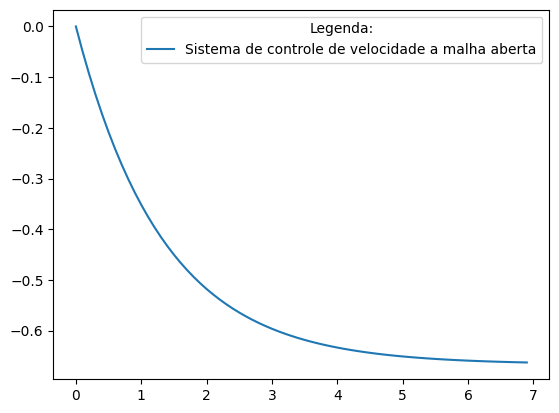

In [ ]:
t_s = np.arange(0, 7, 0.1)

sys = ctrl.tf([-1], [2*(10*0.1/1), 1.5])

tS1, yS1 = ctrl.step_response(sys, T=t_s)

plt.plot(tS1, yS1, label='Sistema de controle de velocidade a malha aberta')
plt.legend(title='Legenda:')
plt.show()

###**EXEMPLO Máquinas perfuratrizes do Canal da Mancha**

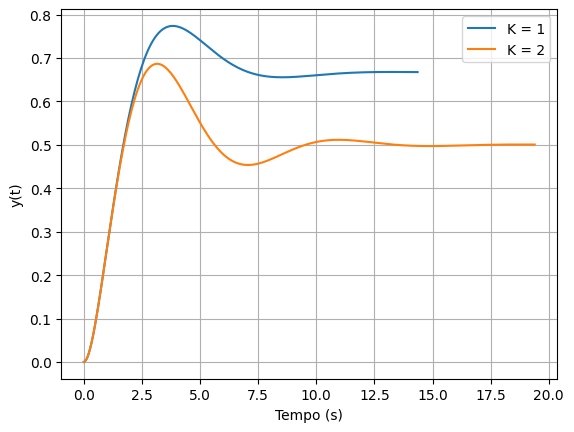

Função de Transferência para K1:
<TransferFunction>: sys[5]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        s^2 + 3 s + 2
-----------------------------
s^4 + 5 s^3 + 9 s^2 + 7 s + 3


Função de Transferência para K2:
<TransferFunction>: sys[6]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


        s^2 + 3 s + 2
-----------------------------
s^4 + 5 s^3 + 9 s^2 + 7 s + 4



In [ ]:
import control as ctl
import matplotlib.pyplot as plt

# Definição dos coeficientes do numerador e denominador
num1 = [1]  # Exemplo: K1 = 1
num2 = [2]  # Exemplo: K2 = 2
den = [1, 3, 2]  # Exemplo de denominador

# Funções de transferência dos controladores
H1 = ctl.TransferFunction(num1, den)
H2 = ctl.TransferFunction(num2, den)

# Sistema em malha aberta
G = ctl.TransferFunction([1], [1, 2, 1])  # Exemplo de sistema G(s)

# Sistemas em malha fechada
retro1 = ctl.feedback(G, H1)
retro2 = ctl.feedback(G, H2)

# Resposta ao degrau
t1, y1 = ctl.step_response(retro1)
t2, y2 = ctl.step_response(retro2)

# Plotando a resposta ao degrau para os dois sistemas
plt.figure()
plt.plot(t1, y1, label='K = 1')
plt.plot(t2, y2, label='K = 2')
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()

# Exibindo as funções de transferência em malha fechada
print("Função de Transferência para K1:")
print(retro1)

print("\nFunção de Transferência para K2:")
print(retro2)


## 4.10 Exemplo de projeto sequencial: Sistema de leitura de acionador de disco

O acionador de disco deve ter presisão para poder realizar a leitura e reduzir os efeitos de vibrações e choques externos.Sendo construido com um braço mecânico flexível emitem as frequências atraves de choques mecânicos.
O sistema de malha fechada usa um amplificador com ganho variável como seu controlador. Primeiro vamos fazer o estado estacionaril para a entrade em degrua unitário, $R(s) = \frac{1}{s}$ quando $D(s) = 0$. Então H(s) =1 vai ser obtido a partir de:
$$E(s) = \frac{1}{1+ K_a G_1(s)G_2(s)}R(s)$$

## Capítulo 5: O desempenho de sistemas de controle com reatroação

##5.1 Introdução

Em um sistema, existem dois tipos de resposta: a resposta transitória e a resposta em regime estacionário (também chamado de regime permanente).

A resposta transitória é aquela que aparece inicialmente no sistema, mas que desaparece depois de certo tempo. Já a resposta em regime estacionário é aquela resposta que se obtém mesmo após muito tempo depois que um sinal de entrada é aplicada ao sistema.

Os sistemas de controle com retroação possuem a vantagem de serem capazes de ajustar o seu desempenho, tanto para o regime de resposta transitória quanto para o regime permanente.

As especificações do projeto de um sistema de controle geralmente são sempre revisadas a fim de garantir que o sistema atenda aos requisitos, de tal forma que garanta o seu desempenho. Essas especificações são capazes de responder à seguinte pergunta: Quão bem o sistema desempenha a tarefa para a qual foi projetado?

##5.2 Sinais de entrada para teste

Ao projetar um sistema de controle, os sinais de entrada são frequentemente desconhecidos para o projetista. Dado isto, a fim de testar o projeto de sistema de controle, normalmente é escolhido um sinal de entrada para teste. Isso é útil pois geralmente existe uma relação entre a resposta obtida pelo sistema alimentado com uma entrada teste, e o comportamento do sistema em condições normais de operação. Muitos sistemas de controle são submetidos a sinais de entrada muito semelhantes aos sinais de teste.

Os sinais de entrada que são normalmente utilizados para testes são a entrada em degrau, em rampa e parabólica. Para sinais de entrada de teste, também se torna útil a utilização da função impulso unitário, que se baseia na seguinte função retangular:

$$
f_\epsilon(t) = \left \{ \begin{matrix} 1/ \epsilon, & -\frac{\epsilon}{2} \le t \le \frac{\epsilon}{2}; \\ 0, & \mbox{nos outros valores de} \ t \mbox{,}\end{matrix} \right.
$$

onde $\epsilon > 0$. Quando $\epsilon$ tende a zero, a função $f_\epsilon(t)$ tende para a função impulso unitário $\delta(t)$, que tem as seguintes propriedades:

$$
\int_{-\infty}^{\infty}{\delta(t)dt = 1},\int_{-\infty}^{\infty}{\delta(t-a)g(t)dt = g(a)}
$$

Os sinais de teste padronizado são da forma geral:

$$r(t)=t^n\mbox{,}$$

E a transformada de Laplace é:

$$R(s) = \frac{n!}{s^{n+1}}\mbox{.}$$

##5.3 Desempenho de um sistema de segunda ordem

A resposta de um sistema de segunda ordem com uma única malha a um sinal de entrada em degrau unitário, é definida por:

$$Y(s) = \frac{G(s)}{1+G(s)}R(s)$$

Considerando o sistema da figura a seguir:

![picture](https://drive.google.com/uc?export=view&id=1qdoEdsrDRE4CUC4HXuxkqcEDMTLWGx_e)

a sua saída dá-se por:

$$Y(s) = \frac{G(s)}{1+G(s)}R(s) = \frac{K}{s^2 + ps + K}R(s)\mbox{.}$$

Se utilizarmos a notação generalizada obtida na seção 2.4 do livro, podemos reescrever a equação acima, para um entrada em degrau unitário, da seguinte forma:

$$Y(s) = \frac{\omega_n^2}{s(s^2 + 2 \zeta\omega_ns + \omega_n^2}\mbox{.}$$

Medidas padrão para o desempenho de um sistema de controle geralmente são definidas utilizando-se a resposta do sistema ao degrau. O tempo de subida, definido como sendo $T_r$, e o tempo de pico, definido como sendo $T_p$, são medidas para a velocidade da resposta.

Quando trabalhamos com sisteams **subamortecidos** com ultrapassagem, torna-se útil utlizar o tempo de subida de 0 a 100%. Em contrapartida, quando o sistema é **sobreamortecido**, torna-se útil utilizar o tempo de subida de 10 a 90% (além disto, nesse caso, o tempo de pico não é definido).

Para uma entrada em degru unitário, a ultrapassagem percentual (U.P.), definida por:

$$\mbox{U.P.} = \frac{M_{p_t} - fv}{fv} \times 100%$$

define a medida de semelhança entre a resposta real e a entrada em degrau, juntamente com o tempo de assentamento ($T_s$), onde $M_{p_t}$ é o valor de pico da resposta temporal e $fv$ é o valor final da resposta.

O tempo de assentamento ($T_s$), também chamado de tempo de acomodação, nada mais é do que o tempo necessário para que a resposta do sistema de controle permaneça dentro de um intervalo percentual ($\delta$) da amplitude de entrada.

## 5.4 Efeitos de um terceiro pólo e de um zero na resposta de um sistema de segunda ordem

As curvas da figura abaixo representam a ultrapassagem percentual e a relação de amortecimento para o sistema de segunda ordem da seção anterior:

![picture](https://drive.google.com/uc?export=view&id=1T3gXqeo3ILtDqPWBgez2oiYKtFD2rCym)

Em muitos sistemas, é possível observar a existência de um par de raízes dominantes, e para esses sistemas, a resposta aproximada ao degrau unitário pode ser obtida utilizando a figura acima.

Apesar da abordagem acima resultar em uma aproximação, ela faz com que o cálculo da transformada inversa de Laplace seja evitado.

Em outras palavras, a resposta de um sistema de terceira ordem pode ser aproximada pelas raízes dominantes do sistema de segunda ordem quando a parte real das raízes dominantes for inferior a $1/10$ da parte real da terceira raiz.

##5.5 Estimativa da relação de amortecimento

O cálculo da relação de amortecimento pode ser obtido através da resposta do sistema a um sinal de entrada em degrau. Com a equação a seguir, é possível obter a resposta ao degrau de um sistema de segunda ordem para uma entrada em degrau unitário:

$$y(t) = 1-\frac{1}{\beta}e^{-\zeta\omega_nt}\mbox{sen}(\omega_n\beta t+\theta)\mbox{,}$$

onde $\beta = \sqrt{1-\zeta^2}$ e $\theta = \cos^{-1}\zeta$. Portanto, a frequência do termo senoidal amortecido para $\zeta < 1$ é:

$$\omega = \omega_n(1-\zeta^2)^{1/2} = \omega_n\beta\mbox{,}$$

e o número de ciclos em um segundo é $\omega/2\pi$.



##5.6 Localização das raízes do plano $s$ e a resposta transitória

Para um sistema de malha fechada, é possível obter a sua função de transferência através da equação a seguir:

$$T(s) = \frac{Y(s)}{R(s)} = \frac{\Sigma P_i(s)\Delta_i(s)}{\Delta(s)} \mbox{,}$$

onde $\Delta(s) = 0$ é a equação característica do sistema.

Através a localização dos pólos da função de transferência de um sistema de controle de malha fechada, é possível obter a sua resposta transitória.

É importante para o analista de sistemas de controle compreender a relação entre a representação em frequências complexas de um sistema linear, através dos polos e zeros de sua função de transferência, e sua resposta no dominio do tempo ao degrau e a outras entradas.

O projetista de sistema competente deve ser capaz de antever os efeitos provocados pela adição, supressão ou deslocamento de pólos e zeros de $T(s)$ no plano $s$ sobre as respostas ao degrau e ao impulso.

Um bom projetista antecipa os efeitos das localizações de zeros sobre a resposta do sistema. Os pólos de $T(s)$ determinam os modos particulares de resposta e os zeros de $T(s)$ estabelecem os pesos relativos das funções correspondentes aos modos individuais.

## 5.7 Erro de estado estacionário de sistemas de controle com retroação

A principal vantagem que faz com que o sistema de controle com retroação seja utilizado é a sua capacidade de reduzir eficietnemente o erro de regime permanente do sistema, também chamado de erro estacionário. Como demonstrado anteriormente, o erro estacionário em sistemas de controle de malha fechada são muito menores do que os erros em sistemas de malha aberta.

O erro real do sistema é dado por:

$$E(s) = R(s) - Y(s)$$

É sempre últil determinar o erro de regime permanente do sistema para as três entradas de teste padrão: entrada em degrau (I), entrada em rampa (II) e entrada em aceleração (III).

Para (I): o erro de regime permanente para uma entrada em degrau de magnitude $A$ é dado por:

$$e_{ss} = \lim_{s\rightarrow0} \frac{s(A/s)}{1+G(s)}=\frac{A}{1+G(0)}\mbox{;}$$

Para (II): o erro de regime permanente para uma entrada em rampa com inclinação $A$ é dado por:

$$e_{ss} = \lim_{s\rightarrow0} \frac{s(A/s^2)}{1+G(s)}=\lim_{s\rightarrow0} \frac{A}{s+sG(s)}= \lim_{s\rightarrow0} \frac{A}{sG(s)}\mbox{;}$$

Para (III): o erro de regime permanente para uma entrada em aceleração, com aceleração igual a $r(t) = At^2/2$ é dado por:

$$e_{ss} = \lim_{s\rightarrow0} \frac{s(A/s^3)}{1+G(s)}=\lim_{s\rightarrow0} \frac{A}{s^2G(s)}\mbox{;}$$

## 5.8 Erro de estado estacionário de sistemas com retroação não-unitária

Na imagem abaixo é mostrado um sistema de retroação genérico com $H(s)$ diferente da unidade:

![picture](https://drive.google.com/uc?export=view&id=1Q-lIHIR2WtwcVpxQoapT16lZ232AilBs)

A saída de uma retroação não unitária Y(s) são diferentes da saída do sensor o sistema da figura é dada por:
$$H(s) = \frac{K_2}{\tau s +1}$$

E o regime estacionarãrio para uma excitaçãp em degrau unitário é:
$$e_{ss} = \lim_{s\rightarrow0}sE(s) =\frac{1}{1 + K_1 G(0)}$$

## 5.9 Índices de desempenho

Os sistemas de controle da atualidade, quando projetados, podem ter o seu desempenho especificado, de forma quantitativa, por seu projetista. Para tal, é calculado e usado um índice de desempenho, que serve, obviamente, para mensurar o desempenho de um sistema de controle.

Medir quantitativamente o desempenho de um sistema de controle se faz necessário para que se alcance o projeto ótimo de sistemas de controle, com sistemas adaptativos e com otimização de parâmetros.

Um índice de desempenho sempre deve ser estabelecido, seja quando se quer projetar um novo sistema de controle, ou quando se quer otimizar um sistema de controle já existente.

Geralmente, um índice de desempenho mínimo, sempre positivo ou nulo, determina o bom desempenho de um sistema de controle. De forma resumida, o melhor sistema, ou o **sistema de controle ótimo** é aquele sistema que reduz ao máximo o seu índice de desempenho.

Para medir o índice de desempenho adequado, fazemos uso da integral do quadrado do erro, também conhecida como ISE (<i>Integral of the Square of the Error</i>), dada por:

$$\mbox{ISE} = \int_0^T{e^2(t)dt}\mbox{,}$$

onde $T$ é um tempo finito arbitrário que faz com que a integral tenda a um valor estacionário. Geralmente é atribuído o tempo de assentamento a $T$.

Ainda existem três outros índices que também são usados como índice de desempenho para um sistema: integral do valor absoluto (IAE), integral do tempo multiplicado pelo valor absoluto (ITEA) e integral do tempo multiplicado pelo quadrado do erro (ITSE):

$$\mbox{I): }IAE = \int_0^T|e(t)|dt$$

$$\mbox{II): }ITAE = \int_0^Tt|e(t)|dt$$

$$\mbox{III): }ITSE = \int_0^Tte^2(t)dt$$

## 5.10 A simplificação de sistemas lineares

Para eliminar um pólo sem importência, tem-se que observar se a parte real negativa é maior que a dos outros pólos, esperando, assim, que o mesmo afete de forma mínima a resposta transitória um processo onde
$$G(s) =\frac{K}{s(s+2)(s+30)}$$
É possivel desconsidera p polo em $s =-30$
$$G(s) =\frac{K/30}{s(s+2)}$$
 Uma forma eficaz tenta conciliar o mais próximo possível a resposta de frequência da função reduzida com a da original. O método de aproximação associado depende de como ele é manipulado algebricamente.


## 5.11 Exemplo de projeto: controle de posicionamento do telescópio Hubble

O telescópio Hubble atualmente  esta em órbita é o mais complexo e caro instrumento usado pelos cientistas. O objetivo do projeto é escolher K_1 E K para que quando acontecesse um comando de degrau unitario a saida não fosse maior que 10% e que o erro estacionário e o seja efeito de pertubação seja reduzido e minimizado. Podemos usar a fórmula de Mason para obter a saída apartir da duas entradas do sistema da figura abaixo.

![picture](https://drive.google.com/uc?export=view&id=1ShSmNgw9q9sZpIuhDHdZ1i4hDVSBn5Rn)

$$Y(s) = T(s)R(s)+[T(s)/K]D(s)\mbox{,}$$
onde
$$T(s) = \frac{KG(s)}{1+KG(s)} =\frac{KG(s)}{1+L(s)}$$
O erro E(s) é
$$E(s) =\frac{1}{1+L(s)R(s)} - \frac{G(s)}{1+L(s)D(s)}$$

## 5.12 Desempenho do sistema Usando o Matlab

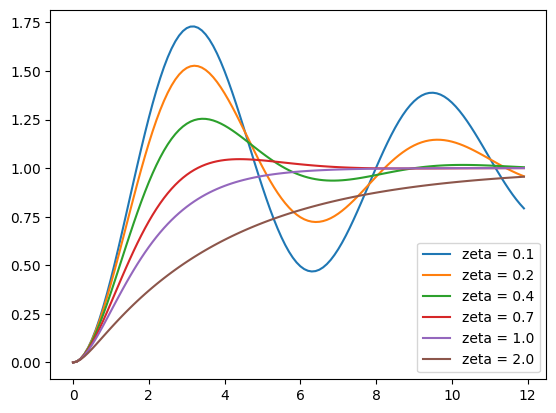

In [ ]:
t = np.arange(0, 12, 0.1)
num = np.array([1])

zeta1 = 0.1
zeta2 = 0.2
zeta3 = 0.4
zeta4 = 0.7
zeta5 = 1.0
zeta6 = 2.0

# Definir os denominadores para cada valor de zeta
den1 = [1, 2 * zeta1, 1]
den2 = [1, 2 * zeta2, 1]
den3 = [1, 2 * zeta3, 1]
den4 = [1, 2 * zeta4, 1]
den5 = [1, 2 * zeta5, 1]
den6 = [1, 2 * zeta6, 1]

# Criar as funções de transferência
sys1 = ctrl.TransferFunction(num, den1)
sys2 = ctrl.TransferFunction(num, den2)
sys3 = ctrl.TransferFunction(num, den3)
sys4 = ctrl.TransferFunction(num, den4)
sys5 = ctrl.TransferFunction(num, den5)
sys6 = ctrl.TransferFunction(num, den6)

# Gerar as respostas ao degrau
t1, y1 = ctrl.step_response(sys1, T=t)
t2, y2 = ctrl.step_response(sys2, T=t)
t3, y3 = ctrl.step_response(sys3, T=t)
t4, y4 = ctrl.step_response(sys4, T=t)
t5, y5 = ctrl.step_response(sys5, T=t)
t6, y6 = ctrl.step_response(sys6, T=t)

# Plotar as respostas ao degrau para diferentes valores de zeta
plt.plot(t1, y1, label='zeta = 0.1')
plt.plot(t2, y2, label='zeta = 0.2')
plt.plot(t3, y3, label='zeta = 0.4')
plt.plot(t4, y4, label='zeta = 0.7')
plt.plot(t5, y5, label='zeta = 1.0')
plt.plot(t6, y6, label='zeta = 2.0')

# Adicionar legenda e exibir o gráfico
plt.legend()
plt.show()

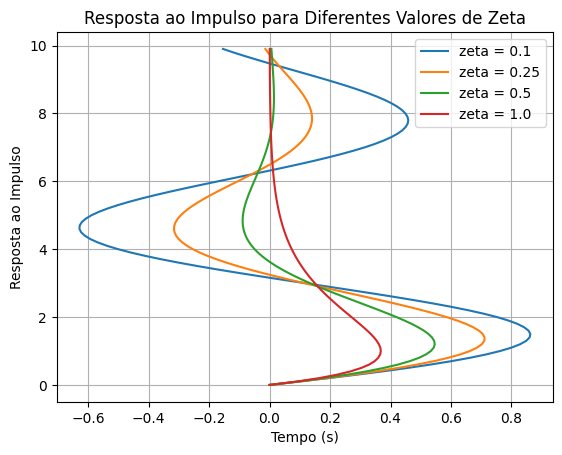

In [ ]:
t2 = np.arange(0, 10, 0.1)
num = [1]  # Numerador do sistema (ajuste conforme necessário)

zeta_values = [0.10, 0.25, 0.50, 1.00]
systems = []

for zeta in zeta_values:
    den = [1, 2 * zeta, 1]  # Denominador do sistema
    systems.append(TransferFunction(num, den))

responses = [impulse(sys, T=t2) for sys in systems]

# Plotando as respostas ao impulso
for i, (y, t) in enumerate(responses):
    plt.plot(t, y, label=f'zeta = {zeta_values[i]}')

plt.legend()
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta ao Impulso')
plt.title('Resposta ao Impulso para Diferentes Valores de Zeta')
plt.grid()
plt.show()


###**EXEMPLO Controle de direção de um robô móvel**

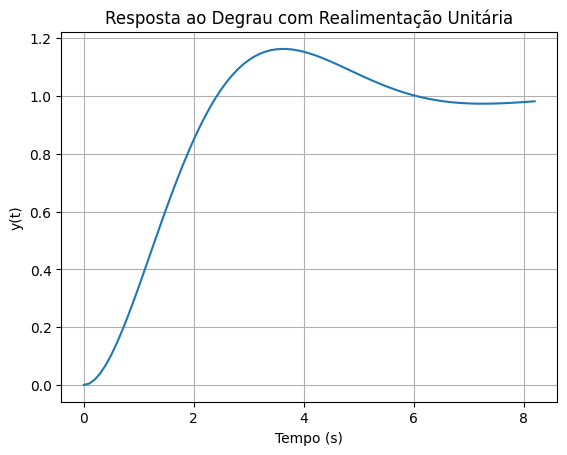

In [ ]:
# Definição da função de transferência
numg = np.array([1])
deng = np.array([1, 1, 0])

sys = ctl.TransferFunction(numg, deng)

# Criando a realimentação unitária
retro = ctl.feedback(sys, 1)  # Aqui especificamos o valor da realimentação

# Criando o vetor de tempo
T = np.arange(0, 8.3, 0.1)

# Resposta ao degrau
t, y = ctl.step_response(retro, T)

# Plotando o resultado
plt.plot(t, y)
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau com Realimentação Unitária')
plt.grid()
plt.show()

###**EXEMPLO Um modelo simplificado**

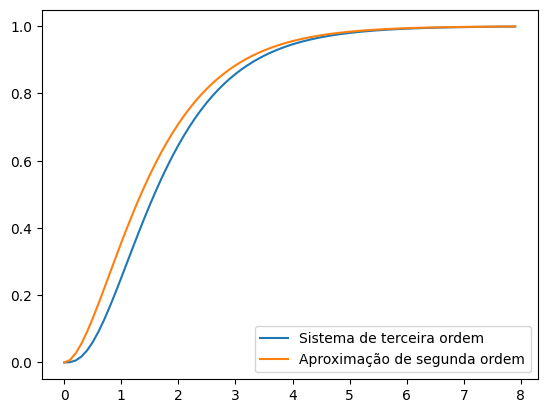

In [ ]:

# Definir o tempo
t_s = np.arange(0, 8, 0.1)

# Numeradores e denominadores das funções de transferência
numS1 = [6]
numS2 = [1.6]

denS1 = [1, 6, 11, 6]
denS2 = [1, 2.584, 1.6]

# Criar as funções de transferência
sysS1 = signal.TransferFunction(numS1, denS1)
sysS2 = signal.TransferFunction(numS2, denS2)

# Obter as respostas ao degrau
tS1, yS1 = signal.step(sysS1, T=t_s)
tS2, yS2 = signal.step(sysS2, T=t_s)

plt.plot(tS1, yS1, label='Sistema de terceira ordem')
plt.plot(tS2, yS2, label='Aproximação de segunda ordem')

plt.legend()
plt.show()


## 5.13 Exemplos de projeto sequencial: Sistema de leitura de acionador de disco

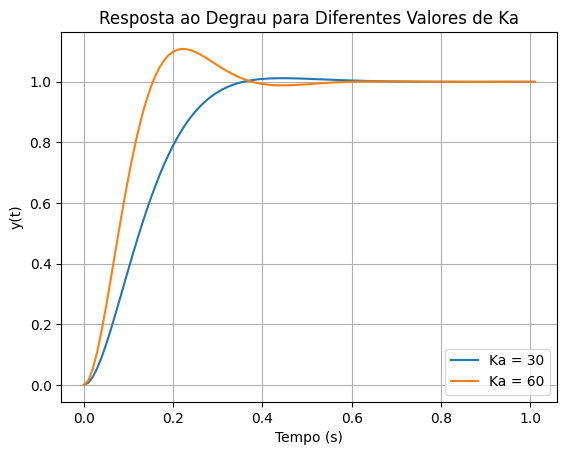

In [ ]:
Ka = [30, 60]

# Criar a figura para os gráficos
plt.figure()

for i in range(len(Ka)):
    T = np.arange(0, 1.02, 0.01)

    # Definição das funções de transferência
    nc, dc = [Ka[i] * 5], [1]
    ng, dg = [1], [1, 20, 0]

    sys1 = ctl.TransferFunction(nc, dc)
    sys2 = ctl.TransferFunction(ng, dg)

    # Multiplicação em série
    function = ctl.series(sys1, sys2)

    # Criar a realimentação unitária
    retro = ctl.feedback(function, 1)

    # Resposta ao degrau
    t_s, y = ctl.step_response(retro, T)

    # Plotando a resposta ao degrau
    plt.plot(t_s, y, label=f'Ka = {Ka[i]}')

# Finalizar o gráfico
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.title('Resposta ao Degrau para Diferentes Valores de Ka')
plt.legend()
plt.grid()
plt.show()


## Capítulo 6: A estabilidade de sistemas lineares com retroação

In [ ]:
import numpy as np
import control as ctl  # Biblioteca correta

# Definição da função de transferência
numg = [1]
deng = [1, 1, 2, 23]

sys = ctl.TransferFunction(numg, deng)

# Criando a realimentação unitária
retro = ctl.feedback(sys, 1)  # Agora a realimentação é explicitamente 1

# Exibir a função de transferência em malha fechada
print(retro)


<TransferFunction>: sys[41]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1
--------------------
s^3 + s^2 + 2 s + 24



Para extrair as raízes da função de transferência, precisamos extrair as raízes do denominador. Logo:

In [ ]:
s = 1

raizes = np.roots([1, 1, 2, 24])

print(raizes[0])
print(raizes[1])
print(raizes[2])

(-3.000000000000001+0j)
(0.9999999999999993+2.6457513110645916j)
(0.9999999999999993-2.6457513110645916j)


##6.1 O conceito de estabilidade

A estabilidade é um fator muito importante para qualquer sistema de controle, de tal modo que um sistema instável é muito pouco útil.

Desta forma, é objetivo de todo projeto de sistema de controle que o sistema seja estável à malha fechada, já que muitos sistemas de malha aberta possuem a instabilidade como característica.

Para estabilizar sistemas instáveis, os projetistas introduzem o controle ativo, fazendo com que outras considerações, como desempenho em regime transitório, possam ser atribuídas. Uma forma de fazer isto é inserindo a retroação nesses processos instáveis, tornando possível o ajuste do desempenho em regime transitório através da utilização de parâmetros.

Podemos classificar um sistema de controle de malha fechada com retroação de acordo com a sua estabilidade: ele pode ser estável ou não estável. A essa estabilidade, damos o nome de **estabilidade absoluta**. Sistemas estáveis podem, ainda, possuírem um grau de estabilidade, e a essa estabilidade, damos o nome de **estabilidade relativa**.



##6.2 O critério de estabilidade de Routh-Hurwitz

O método de Routh-Hurwitz considera a equação característica do sistema para fornecer o grau de estabilidade do mesmo. Essa equação, escrita no domínio de Laplace, é dada por:

$$\Delta(s) = q(s) = a_ns^n + a_{n-1}s^{n-1} + \cdots + a_1s + a_0 = 0$$

Fatorando a equação acima, temos:

$$a_n(s-r_1)(s-r_2) \cdots (s-r_n) = 0 \mbox{,}$$

onde $r_i$ é a i-ésima raiz da equação característica.

O critério de Routh-Hurwitz se baseia na ordenação dos coeficientes da equação característica $q(s)$ em uma tabela, como mostrado a seguir:

$$
\begin{array}{l|llll}
  s^n & a_n & a_{n-2} & a_{n-4} & \cdots\\
  s^{n-1} & a_{n-1} & a_{n-3} & a_{n-5} & \cdots\\
\end{array}
$$

Preenchemos o restante da tabela da seguinte forma:

$$
\begin{array}{l|lll}
  s^n & a_n & a_{n-2} & a_{n-4}\\
  s^{n-1} & a_{n-1} & a_{n-3} & a_{n-5}\\
  s^{n-2} & b_{n-1} & b_{n-3} & b_{n-5}\\
  s^{n-3} & c_{n-1} & c_{n-3} & c_{n-5}\\
  \cdot & \cdot & \cdot & \cdot\\
  \cdot & \cdot & \cdot & \cdot\\
  \cdot & \cdot & \cdot & \cdot\\
  s^0 & h_{n-1}\\
\end{array}
$$

onde

$$
b_{n-1} = \frac{(a_{n-1})(a_{n-2}) - a_n(a_{n-3})}{a_{n-1}} = \frac{-1}{a_{n-1}}
\begin{array}{|ll|}
  a_n & a_{n-2}\\
  a_{n-1} & a_{n-3}\\
\end{array}
\text{,}
$$

$$
b_{n-3} = -\frac{1}{a_{n-1}}
\begin{array}{|ll|}
  a_n & a_{n-4}\\
  a_{n-1} & a_{n-5}\\
\end{array}
\text{,}
$$
e
$$
c_{n-1} = \frac{-1}{b_{n-1}}
\begin{array}{|ll|}
  a_{n-1} & a_{n-3}\\
  b_{n-1} & b_{n-3}\\
\end{array}
\text{,}
$$
e assim por diante.

O critério de Routh-Hurwitz estabelece que o número de raízes de $q(s)$ com parte real positiva é igual ao npumero de trocas de sinal da primeira coluna da tabela de Routh. Este critério requer que não haja troca de sinal na primeira coluna para se ter um sistema estável. Este requisito é ao mesmo tempo necessário e suficiente.

##6.3 A estabilidade relativa de sistemas de controle com retroação

O critério de Routh-Hurwitz fornerce apenas uma resposta parcial a estabilidade, assegurando que se algum sistema tiver algumas raízes estiver no semiplano $s$ da direita ela tera estabilidade absoluta. Porem sem um sistema tiver uma estabilidade absoluta podemos determinar a **estabilidade relativa**.
A estabilidade relativa das raízes é nescessária porque assim conseguimos localizar os pólos a malha fechada no plano $s$ determinando assim com vai ser o desempenho do sistema.
Para realizar a estabilidade relativa de um sistema é necessario achar as raizes da equação caracteristica para isso é usado a extenção do critério de Routh-Hurwitz  e pode ser feito substituindo as variáveis que desloca os eixos no plano $s$

##6.4 A estabilidade de sistemas com variáveis de estado

Pode ser determinada a estabilidade de um sistema modelado através de um diagrama de fluxo com variáveis de estado. A função de transferência $T(s)$ quando relacionamos a saída e a entrada pode ser determinada expondo um denominadr de $T(s)$ e pode ser escrita como:
$$T(s) = \frac{p(s)}{q(s)}$$
Onde $p(s)$ e $q(s)$ são polinômios em $s$. Para assegurar a estabilidade de um sistema se utiliza o critério de Routh-Hurwitz.

## 6.5 Exemplo de projeto: Controle de manobra de veículo sobre lagartas

O projeto envolve a seleção de dois parâmetros. O sistema (a) e o modelo (b) são mostrados na figura abaixo:
![picture](https://drive.google.com/uc?export=view&id=1dKPhRUXcvAYtLkmRQbwBl4ZmjePNM5R5)<br>
As duas lagartas são operadas com diferentes velocidades para realizar a manobra. As velocidades $K$ e $A$ são escolhidas para que o erro estacionário ao comando em rampa seja inferior a 24%. A equação de retroação do sistema é:
$$1+G_cG(s) =0$$
e tambem pode ser escrita:
$$1 + \frac{K(s+a)}{s(s+1)(s+2)(s+5)} = 0$$


##6.6 Estabilidade de um sistema usando o Matlab

In [ ]:

# Definição da função de transferência
numg = [1]
deng = [1, 1, 2, 23]

sys = ctl.TransferFunction(numg, deng)

# Criando a realimentação unitária
retro = ctl.feedback(sys, 1)  # Agora a realimentação é explicitamente 1

# Exibir a função de transferência em malha fechada
print(retro)


<TransferFunction>: sys[44]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


         1
--------------------
s^3 + s^2 + 2 s + 24



As raízes da função de transferência dependem do denominador da função acima. Neste caso, usando a função roots(), conseguimos estrair as raízes da equação $s^3 + s^2 + 2s + 24$, informando os coeficientes $a$, $b$, $c$, e $d$ da equação:


In [ ]:
raizes = np.roots([1, 1, 2, 24])

print(raizes[0])
print(raizes[1])
print(raizes[2])

(-3.000000000000001+0j)
(0.9999999999999993+2.6457513110645916j)
(0.9999999999999993-2.6457513110645916j)


[ 20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120]


Text(0, 0.5, 'a')

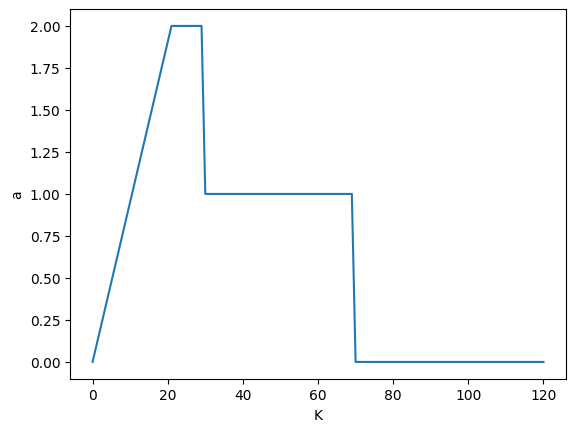

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.array(np.arange(0.1, 3.0 + 0.01, 0.01))
K = np.array(np.arange(20, 120 + 1, 1))
X = 0 * K
Y = 0 * K
n = len(K)
m = len(a)

print(K)

for i in np.arange(1, n).reshape(-1):
    for j in np.arange(1, m).reshape(-1):
        q = np.array([1, 8, 17, K[i] + 10, K[i] * a[j]])
        p = np.roots(q)

        if np.amax(p) > 0:
            X[i] = K[i]
            Y[i] = a[j - 1]
            break

plt.plot(X, Y)
plt.xlabel('K')
plt.ylabel('a')

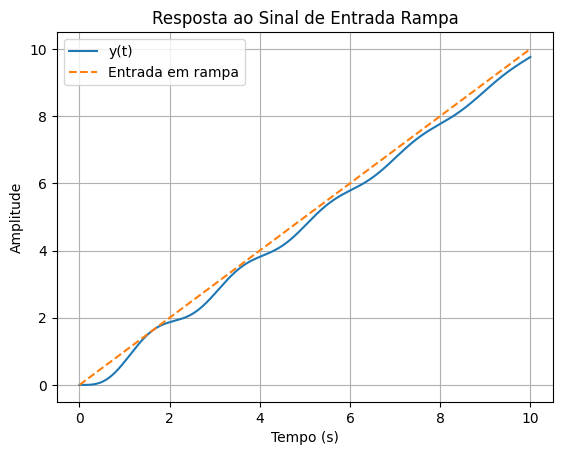

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # Biblioteca correta

# Vetor de tempo
t = np.arange(0, 10.01, 0.01)
u = t  # Entrada rampa

# Definição das funções de transferência
numgc = [1, 0.6]
dengc = [1, 1]

numg = [70]
deng = [1, 7, 10, 0]

# Criando as funções de transferência corretamente
sys1 = ctl.TransferFunction(numgc, dengc)
sys2 = ctl.TransferFunction(numg, deng)

# Multiplicação em série
function1 = ctl.series(sys1, sys2)

# Criando a realimentação unitária
function2 = ctl.feedback(function1, 1)

# Simulação da resposta ao sinal de entrada (rampa)
t_out, y_out = ctl.forced_response(function2, T=t, U=u)

# Plotando os resultados
plt.plot(t_out, y_out, label="y(t)")
plt.plot(t, u, label="Entrada em rampa", linestyle="dashed")
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.title("Resposta ao Sinal de Entrada Rampa")
plt.legend()
plt.grid()
plt.show()


###**EXEMPLO Controle de veículo sobre lagartas**

In [ ]:
A =[[-8,-16,-6],[1,0,0],[0 ,1,0]]
np.poly(A)
raizes = np.roots(np.poly(A))
print(raizes[0])
print(raizes[1])
print(raizes[2])

-5.0861301976514905
-2.428006731683792
-0.485863070664709


###**EXEMPLO Região de estabilidade para um processo a controlar instável**

(51, 46) (51, 46)


<ipython-input-16-cfb568ad0dc7>:4: RuntimeWarning: invalid value encountered in divide
  k = p * (p - 1) / (p - 1 - z)


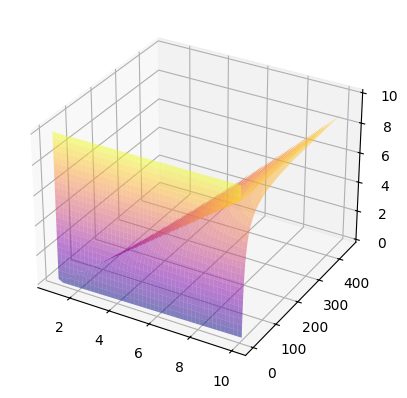

In [ ]:
p, z = np.meshgrid(np.arange(1.0, 10 + 0.2, 0.2), np.arange(0, 10 + 0.2, 0.2))
print(p.shape, z.shape)

k = p * (p - 1) / (p - 1 - z)
rc = k.shape
r, c = rc

for i in np.arange(1,r).reshape(-1):
    for j in np.arange(1,c).reshape(-1):
        if np.abs(z[i,j] - p[i,j] + 1) < 0.001:
            k[i,j] = 0
        if k[i,j] < 0:
            k[i,j] = 0

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(p, k, z, cmap="plasma", linewidth=0, antialiased=True, alpha=0.5, )

plt.show()

## Capítulo 7: O método do lugar das raízes

##7.1 Introdução

A localização das raízes de equação característica a malha fechada no plano $s$, está diretamente relacionada com a estabilidade relativa e a execução de um sistema de controle a malha fechada. Frequentemente é preciso adequar um parâmetro ou mais, a fim de se obedecer a disposição apropriada das raízes. consequentemente, vale a pena estabelecer como as raízes da equação característica de um dado sistema se deslocam através do plano $s$, a medida que os parâmetros mudam de valor. O metódo lugar das raízes é uma forma de esboçar em gráfico, no plano $s$, o lugar geométrico das raízes a medida que um parâmetro é variado, e pode ser usado com grande vantagem em conjunto com o critério de Routh-Hurwitz.
Através desse método, pode-se investigar o lugar das raízes de equação característica de um sistema com múltiplas malhas tão répido quanto um de malha única.

##7.2 O conceito de lugar das raízes

Sejam $p(s)$ e $q(s)$ polinômios em $s$, um sistema de controle a malha fechada tem seu desempenho dinâmico definido através da função de transferência a malha fechada a seguir:

$$T(s) = \frac{Y(s)}{R(s)} = \frac{p(s)}{q(s)} \text{,}$$

onde os modos da resposta do sistema são determinados pelas raízes da equação característica $q(s)$.

**O lugar das raízes é o percurso das raízes da equação característica traçado no plano $s$ à medida que um parâmetro do sistema é alterado.**

Usualmente, é desejável contar com um procedimento sistematizado para localização do lugar das raízes à medida que um parâmetro varia.

##7.3 O procedimento do lugar das raízes

Para localizar graficamente, no plano $s$, as raízes da equação característica de um sistema, pode-se seguir a sequência dos doze passos a seguir:

**Passo 1:** Escrever a equaçã característica como:

$$1+F(s) = 0$$

e reorganizar a equação, se necessário, de modo que o parâmetro de interesse, K, apareça como fator multiplicativo sob a forma:

$$1+KP(s) = 0$$

**Passo 2:** Fatorar $P(s)$, se necessário, e escrever o polinômio na forma de pólos e zeros como se segue:

$$
1 + K \frac{\prod_{i=1}^M(s + z_i)}{\prod_{j=1}^n(s + p_j)} = 0\text{.}
$$

**Passo 3:** Localizar os pólos e zeros no plano $s$ com símbolos selecionados. Geralmente, há interesse em determinar o lugar das raízes à medida que $K$ varia no intervalo

$$0 \le K \le \infty \text{.}$$

Reescrevendo a equação do passo anterior, tem-se

$$
\prod_{j=1}^n = (s+p_j)+K\prod_{i-1}^M(s+z_i)=0\text{.}
$$

**Passo 4:** Localizar os segmentos do eixo real que são lugares das raízes. O lugar das raízes no eixo real está sempre em uma seção do eixo real à esquerda de um número ímpar de pólos e zeros.

###**EXEMPLO Sistema de segunda ordem**

**Passo 5:** Determinar o número de lugares separados, $LS$. Como os lugares se iniciam nos pólos e terminam nos zeros, o número de lugares separados é igual ao número de pólos, uma vez que o número de pólos é maior que ou igual ao número de zeros.

**Passo 6:** O lugar das raízes deve ser simétrico em relação ao eixo real porque as raízes complexas devem aparecer aos pares de raízes complexas conjugadas.

**Passo 7:** Os lugares avançam em direção aos zeros no infinito segundo assíntotas centradas em $\sigma_A$ com ângulos $\phi_A$. Quando o número de zeros infinitos de $P(s)$, $n_z$, é menor do que o número de pólos, $n_p$, de um número $N = n_p - n_z$, então $N$ seções de lugares devem finalizar em zeros no infinito. Estas seções de lugar avançam em direção aos eros no infinito ao longo de assíntotas à medida que $K$ tende ao infinito.

###**EXEMPLO Sistema de quarta ordem**

**Passo 8:** Determinar o ponto no qual o lugar cruza o eixo imaginário (se isto ocorrer), usando o critério de Routh-Hurwitz. O ponto real no qual o lugar das raízes intercepta o eixo imaginário é prontamente calculado utilizando-se o critério de Routh-Hurwitz.

**Passo 9:** Determinar o ponto de saída do eixo real (se existir).

###**EXEMPLO Sistema de terceira ordem**

**Passo 10:** Determinar o ângulo de saída do lugar a partir de um pólo e o ângulo de chegada do lugar em um zero, usando o critério de ângulo de fase.

**Passo 11:** Determinar as localizações de raiz que satisfazem o critério de fase na raiz $s_x$, $x = 1, 2, \dots, n_p$. O critério de fase é:

$$
\angle{P(s)} = 180° \pm q360° \text{, } q = 1, 2, \dots
$$

**Passo 12:** Determinar o valor do parÂmetro $K_x$ em uma raiz específica $s_x$ usando o requisito de magnitude. O requisito de magnitude em $s_x$ é

$$
\begin{array}{l|l}
  K_x = {\frac{\prod_{j=1}^n |(s+p_j)|}{\prod_{i=1}^m |(s+z_i)|}} & _{s=s_x}
\end{array}
$$

###**EXEMPLO Sistema de quarta ordem: Um exemplo de análise e projeto de sistemas de controle utilizando o método do lugar das raízes**

Quando queremos analisar ou projetar um sistema de controle, utilizamo-nos da transformada de Laplace, de um diagrama de fluxo de sinal, do plano $s$ e do método do lugar das raízes, sendo este último muito útil para selecionar valores de parâmetros, quando se está examinando um sistema.

Uma balança com escala automática na qual a operação de pesagem é controlada por uma função do equilíbrio físico através de uma malha de retroação elétrica é mostrada na figura a seguir:

![picture](https://drive.google.com/uc?export=view&id=1n9Zdsu4HqJRJ_uu2MyNpzMu5tfYcDnzi)

A balança está na condição de equilíbrio e $x$ é o deslocamento do contrapeso $W_c$ a partir de uma condição de equilíbrio sem carga. O peso a ser medido, $W$, é aplicado a 5 cm do pivô, e o comprimento da barra até o amortecedor viscoso, $l_i$, é 20 cm. Deseja-se realizar o seguinte:

1. Selecionar os parâmetros e as especificações do sistema de retroação.
2. Obter um modelo em diagrama de fluxo de sinal que represente o sistema.
3. Selecionar o ganho $K$ baseado em um diagrama do lugar das raízes.
4. Determinar o modo dominante da resposta.

**Especificações.** Deseja-se uma resposta rápida e precisa com um pequeno erro estacionário na medida de peso. Portanto vai ser necessário que o sistema seja no mínimo do tipo um, para que o erro de medida obtido seja igual a zero. Uma resposta subamortecida a uma variação em degrau no peso medido $W$ é satisfatória, e então será especificada uma resposta dominante com $\zeta $ = 0,5. O tempo de assentamento no interior de uma faixa de 2% do valor final do equilíbrio que se segue à introdução de um peso a ser medido deve ser inferior a 2 segundos a fim de se ter um instrumento rápido para medir peso. As especificações estão resumidas na tabela a seguir:

<center><b>TABELA 7.5 Especificações</b></center>
$$
\begin{array}{l|l}
  \text{Erro de estado estacionário} & K = \infty, e_{ss} = 0 \text{ para uma entrada em degrau}\\
  \text{Resposta subamortecida} & \zeta = 0,5\\
  \text{Tempo de assentamento (critério dos 2%)} & \text{Menos de 2 segundos}\\
\end{array}
$$



##7.5 Projeto de parâmetro pelo método do lugar das raízes

Quando queremos determinar o desempenho dinâmico de um sistema, onde os modos da resposta do sistema são determinados pelas raízes da equação característica  $q(s)$, nos utilizamos da função de transferência desse sistema para obter esse desempenho através do método do lugar das raízes.

Esse método é comumente aplicado a sistemas que possuem influência de um único parâmetro de sistema. Entretanto, para sistemas que recebem mais de um parâmetro, podemos nos utilizar do método estendido do lugar das raízes.

Um sistema dinâmico tem sua equação característica descrita por:

$$
a_ns^n + a_{n-1}s^{n-1} + \dots + a_2s^2 + a_0 = 0 \text{.}
$$

Deste modo, quando queremos determinar o desempenho de um sistema dinâmico com dois parâmetros ($\alpha$ e $\beta$), utilizamos a abordagem acima de forma estendida, como demonstrado na equação abaixo:

$$
a_ns^n + a_{n-1}s^{n-1} + \dots + (a_{n-q}-\alpha)s^{n-q} + \alpha s^{n-q} + \dots + (a_{n-r}-\beta)s^{n-r} + \dots + a_1s + a_0 = 0\text{.}
$$



##7.6 Sensibilidade e lugar das raízes

As variações dos parâmetros de um sistema influenciam na posição das raízes, e medir essa variação é importante, uma vez que as raízes da equação característica de um sistema representam os modos sominantes da resposta transitória.

Podemos definir a sensibilidade de raiz de um sistema $T(s)$ como sendo:

$$
S_K^{r_i} = \frac{\partial{r_i}}{\partial \text{ ln} K} = \frac{\partial{r_i}}{\partial K/K} \text{,}
$$

onde $r_i$ é igual a i-ésima raiz do sistema, de modo que

$$
T(s) = \frac{K_1 \prod_{j=1}^m(s+z_j)}{\prod_{i=1}^n(s+r_i)}\text{,}
$$

e $K$ é o parâmetro. A sensibilidade de raiz relaciona as mudanças na localização das raízes no plano $s$ com as mudanças no parâmetro.

Esta sensibilidade logarítmica pode ser prontamente obtida determinando-se a derivada de $T(s)$ com relação a $K$.

O cálculo da sensibilidade de raiz para um sistema de controle pode ser prontamente efetuado utilizando-se os métodos do lugar das raízes. A sensibilidade de raiz $S_K^{r_i}$ pode ser calculada na raiz $r_i$ examinando-se contornos da raiz para o parâmetro $K$. É possível variar $K$ de uma pequena quantidade $\Delta K$, finita e calcular a nova raiz modificada $(r_i + \Delta r_i)$ em $K + \Delta K$.

##7.7 Controladores de três termos (PID)

O controlador de três termos, também conhecido como controlador PID (Controlador Proporcional Integral Derivativo), possui a seguinte função de transferência:

$$
G_c(s)=K_p+\frac{K_1}{s}+K_Ds \text{.}
$$

Sendo amplamente utilizado no mercado, esse controlador possui esse nome por possuir um termo proporcional, um termo integral e um termo derivativo.

Quando $K_D$ (termo derivativo) é igual a zero, então:

$$
G_c(s) = K_p + \frac{K_I}{s} \text{,}
$$

e chamamos esse sistema de controlador proporcional e integral (PI).

Quando $K_I$ (termo integral) é igual a zero, então:

$$
G_c(s) = K_p + K_Ds \text{,}
$$

e chamamos esse sistema de controlador proporcional e derivativo (PD).

Controladores do tipo PID são utilizados em diversos processos industriais, e sua popularidade se dá à sua relativa simplicidade funcional, e à sua capacidade de operar em uma grande faixa de condições de operação mantendo o seu desempenho.

##7.8 Exemplo de projeto: sistema de controle de um manipulador de laser


Os lasers possuem um universo de aplicação muito grande. Eles são utilizados, por exemplo, para a realização de cirurgias de diferentes complexidades. Nesse caso, é necessário sempre se ter uma altíssima precisão na resposta de posicionamento e de velocidades desses lasers.

Na figura abaixo, temos o exemplo de uma aplicação que utiliza um motor CC para o laser:

![picture](https://drive.google.com/uc?export=view&id=1FjbGJ574bOCbvaH1InGV9NMay9wrIrwG)

Devemos realizar um ajuste no ganho do amplificador $K$ de tal forma que a resposta do sistema se mantenha estável, e que também o erro estacionário a uma entrada em rampa seja menor ou igual a 0,1 mm.

O erro estacionário a uma rampa é dado por:

$$
e_{ss} = \frac{A}{K_v} = \frac{A}{K} \text{.}
$$

Como o que desejamos é um erro estacionário de 0,1mm ou menos, ou seja, $e_{ss} \le 0,1mm$, e $A = 1mm$, então necessitamos de um ganho $K \ge 10$.

Para garantir um sistema estável, obtemos a equação característica a partir de:

$$
s^3 + 15s^2 + 50s + 50K = 0
$$

Construindo a tabela de Routh, temos:

$$
\begin{array}{l|ll}
  s^3 & 1 & 50\\
  s^2 & 15 & 50K\\
  s^1 & b_1 & 0\\
  s_0 & 50K \text{,}
\end{array}
$$

onde

$$
b_1 = \frac{750-50K}{15} \text{.}
$$

Portanto, o sistema é estável para

$$
0 \le K \le 15 \text{.}
$$

##7.9 Projeto do sistema de controle de um robô

A idéia é que os robôs se dupliquem e desenvolvam uma indústria que fabrica robôs automaticamente. Um modelo de instalação para replicação de um robô.<bR>
![picture](https://drive.google.com/uc?export=view&id=16TmewkV27Z0H6ytFjWkYa73glrYtlQCc)

As características para controlar o mobilidade de um braço são:

* Um tempo de assentamento no interior da faixa de 2% do valor final menor a 2 segundos
* Uma superação porcentagem menor a 10% para uma entrada em degrau
* Um erro estacionário nulo a uma entrada em degrau.

A configuração visa o uso de retroação de velocidade bem como o uso de um controlador $G_c(h)$. Como o robô é muito leve e flexível, a função de transferência do braço é

$$\frac{Y(s)}{U(s)} = \frac{1}{s^2}G(s)$$
e
$$$$



$$G(s) = \frac{(s^2 + 4s + 10004)(s^2 + 12s + 90036)}{(s + 10)(s^2 + 2s + 250l)(s^2 + 6s + 22509)}$$

##7.10 Lugar das raízes usando o Matlab

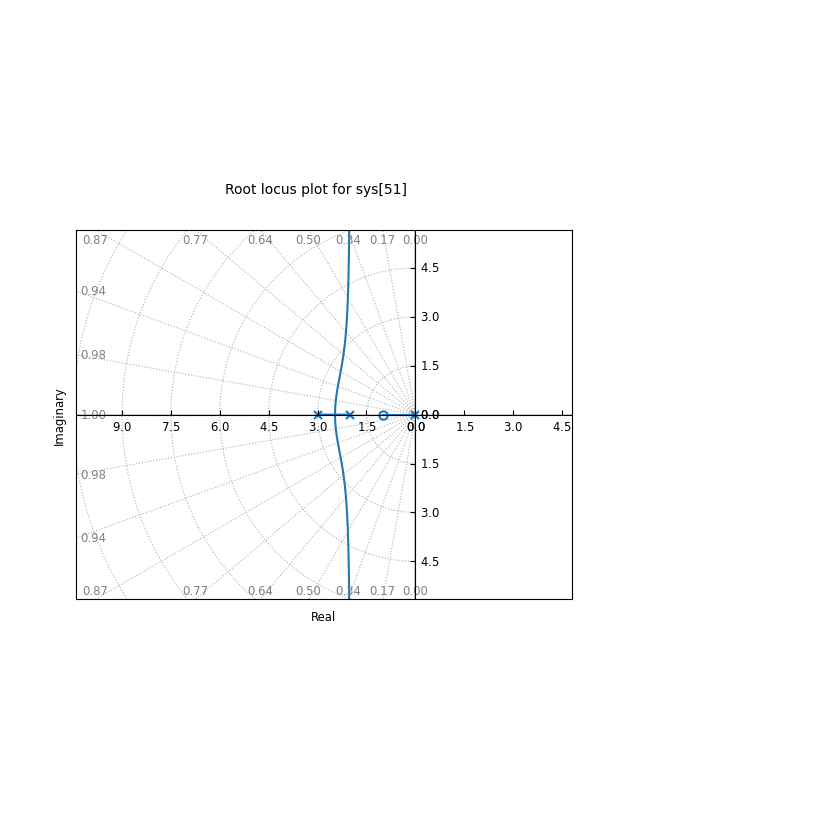

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # Biblioteca correta

# Coeficientes do numerador e denominador
p = [1, 1]  # Lista padrão do Python
q = [1, 5, 6, 0]  # Lista padrão do Python

# Criando a função de transferência corretamente
sys = ctl.TransferFunction(p, q)

# Gerando o Lugar das Raízes
ctl.rlocus(sys)

# Exibindo o gráfico
plt.show()


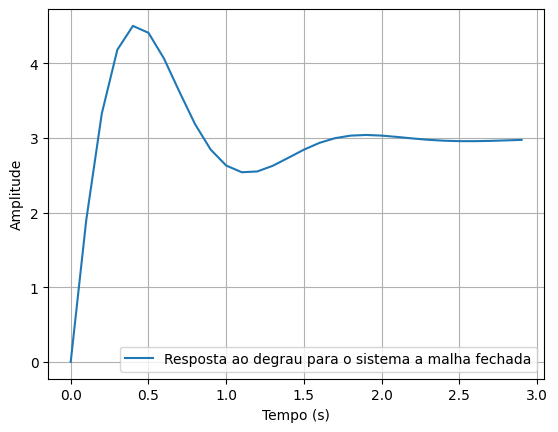

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # Biblioteca correta

# Definição do ganho
k = 20.5775

# Numerador e denominador da função de transferência
num = [1 * k, 4 * k, 3 * k]  # Listas padrão do Python
den = [1, 5, 6 + k, k]

# Criando o sistema de controle
sys = ctl.TransferFunction(num, den)

# Definição do tempo de simulação
t_s = np.arange(0, 3, 0.1)

# Obtendo a resposta ao degrau
tS1, yS1 = ctl.step_response(sys, T=t_s)  # Correção aqui

# Plotando a resposta ao degrau
plt.plot(tS1, yS1, label='Resposta ao degrau para o sistema a malha fechada')
plt.xlabel("Tempo (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid()
plt.show()


##7.11 Exemplo de projeto sequencial: sistema de leitura de acionador

O lugar das raízes para selecionar os ganhos do controlador. O controlador PID que vamos utilizar como exemplo é:
$$G_c(s) =K_1 + \frac{K_2}{s} + K_3s$$

O modelo do processo a controlar, $G_1(s)$, já tem alguma associação, faz-se $K2 = O$. Tem-se ovcontrolador PD
$$G_c(s) =K_1  + K_3s$$

$K_1$ e $K_3$  tem o objetico de atender as especificações. A função de transferência a malha fechada é
$$\frac{Y(s)}{R(s)} = T(s) = \frac{G_c(s)G_1(s)G_2(s)}{1+ G_c(s)G_1(s)G_2(s)H(s)}$$
onde $H(s) = l$.

## Capítulo 10: O projeto de sistemas de controle com retroação

## 10.1 introdução

A performance de um sistema de controle é de crucial importância. Um sistema de controle certo deve estar estável, competente de render resultados admissíveis aos instruções de entrada, estar pouco sensível a mudanças de características do modelo, ter erros estacionários pequenos para os instruções de entrada e, por último, ser bom de tomar o efeito de perturbações indesejáveis. Um sistema de controle com retroação que conceda um performance excelente sem necessidade de nenhuns ajustes é, na realidade, um caso eventual. Geralmente, em que não é capaz conseguir totalmente as propriedades desejadas, toma-se fundamental estabelecer um compromisso entre as distintas especificações requeridas e conflitantes e proceder ao arranjo dos parâmetros do sistema de modo a alcançar um performance aceitável.<BR>
É possível ajustar os parâmetros do sistema no objetivo de se conseguir uma conclusão almejada. No entanto, muitas vezes se percebe que não é suficiente regular um modelo do sistema. Em vez disto, toma-se necessário repesar a base do sistema e reprojetá-lo . Logo, o projeto de um sistema de controle trata da compreensão e da execução da estrutura do sistema e da escolha de elementos e de características indicados.<BR>
A alteração ou o acerto de um sistema de controle com a objetivo de obter um performance pertinente é chamada de compensação. Ao se reprojetar um sistema de controle de modo a alterar a resposta, insere-se um elemento extra na estrutura do sistema com retroação. É este componente ou item complementar que equilibra ou supre a escassez de performance. O dispositivo de compensação pode ser elétrico, mecânico, hidráulico, pneumático ou algum outro tipo de item ou morfologia e é freqüentemente dito de compensador.

##10.2 Abordagem ao projeto de sistemas

O performance de um sistema de controle pode ser feito em termos de marcas de comportamento no domínio do tempo ou de medidas de desempenho no domínio de freqüência. O desempenho de um modelo pode ser especificado requerendo-se um certo tempo de pico, $T_p$, um valor máximo de superação e um tempo de registro para uma entrada em degrau. Estas características de desempenho podem ser definidas em limites da posição almejada para os pólos e zeros da função de transferência a malha fechada, $T(s)$. Logo, é capaz estar explanada a localização, no planos, dos pólos e zeros de $T(s)$. O lugar das raízes do sistema a malha fechada pode ser atingido exatamente em função da variação de um dos parâmetros do sistema. No entanto, quando o lugar das raízes não resulta em uma arranjo adequada, é necessário incluir uma estrutura de compensação para modificar o lugar das raízes em função da variação de um dado. Pode-se exercer o método do lugar das raízes e provocar a função de transferência da estrutura conforme de modo que o lugar das raízes resultante acompanhe à configuração almejada de raízes a malha fechada.
Alternativamente, pode-se relatar o performance de um sistema de controle com retroação em marcas de medidas de execução no domínio de freqüência. Consequentemente, um sistema consegue ser explicado em termos do valor de pico da resposta de freqüência a malha fechada, MP., da freqüência de ressonância, w,, da banda passante e da margem de fase do sistema. Pode-se desenvolver uma sistema de compensação adequada, se necessário, a fim de satisfazer as características do sistema.
Os métodos de feedback de freqüência tratam de converter o sistema de modo que a resposta de freqüência do sistema compensado satisfaça as
regras.
De outro modo, o projeto de um sistema de controle pode ser realizado no planos através de métodos do lugar das raízes. No caso do planos, o projetista deseja mudar e reconfigurar o lugar das raízes de
modo que as raízes do sistema estejam localizadas na posição desejada do plano $s$.

##10.3 Estruturas de compensação em cascata

A estrutura de compensação, $G_c(s)$, é inserida em cascata com o processo constante $G(s)$ a fim de se conseguir uma função de transferência de malha $G_c(s)G(s)H(s)$ boa. O compensador $G_c(s)$ pode ser determinado ora para alterar a forma do lugar das raízes, ou para mexer a resposta de freqüência. Em ambos os atos, pode-se destacar a estrutura como tendo a função de transferência
$$
G_c(s) = \frac{K \prod_{i=1}^M(s+z_i)}{\prod_{j=1}^N(s+p_j)}\text{,}
$$
O impasse se restringe então à designação correspondente dos pólos e zeros do compensador. A aproximação de compensação desenvolvida com base em um compensador de primeira ordem pode ser ofertada a compensadores de ordem elevada. Um compensador, $G_c(s)$, é corriqueiro com um sistema a controlar $G(s)$ de modo que o rendimento de malha total possa ser combinado para esclarecer os condições de erro estacionário, e em seguida $G_c(s)$ é usado
para ajustar favoravelmente a dinâmica do sistema sem afetar o erro de estado estacionário.<BR>
Freqüentemente é útil adicionar uma estrutura de compensação em cascata para fornecer uma característica de atraso de
$$G_c(s) =\frac{V_0(S)}{V{in}(S)} =\frac{R_2 + (l/C_s)}{R_1 + R_2 + (l/C_s)} = \frac{R_2C_s+1}{(R_1 + R_2)C_s +1}$$

##10.4 Projeto de avanço de fase usando diagrama de Bode

Os diagramas de Bode são consumidos de preferência, em relação a demais gráficos de resposta de freqüência, para projetar uma estrutura de avanço de fase. A estrutura de compensação é dada adotando-se os seguintes passos:
1. Calcular a margem de fase do sistema sem compensação para a qual as constantes de erro sejam
satisfatórias.
2. Determinar o avanço de fase adicional necessário,$\phi_m$, acrescentando uma pequena folga por medida de segurança.
3. Calcular o valor de a a partir da $sen \phi_m =\frac{\alpha -1}{\alpha + 1}$.
4. Calcular $10 log \alpha$ e determinar a freqüência em que a magnitude da curva sem compensação é igual a $-10 log \alpha dB$. Como a estrutura de compensação oferece um ganho de$10 log \alpha$ em $ \omega_m$, esta freqüência passa a ser, simultaneamente, a nova freqüência de cruzamento de $0 dB$ e $ \omega_m$.
5. Calcular o pólo $p = \omega_m \sqrt \alpha$ e o zero $z =p\alpha$.
6. Desenhar a resposta de freqüência compensada, verificar a margem de fase resultante e repetir os
passos anteriores, se necessário. Finalmente, para um projeto aceitável, aumentar o ganho do
amplificador a fim de levar em conta a atenuação $1/ \alpha$.


## 10.5 Projeto de avanço de fase usando o Lugar das raízes

O projeto de uma estrutura de compensação por avanço de fase também pode ser realizado usando-se o lugar das raízes
$$G_C(s) =\frac{s +(1/\alpha \tau)}{s +(1/\tau)} =\frac{s+z}{s+p} $$
O método do lugar das raízes no planos é o seguinte:

1. Listar as especificações do sistema e traduzi-las em localização de um conjunto de raízes dominantes.
2. Esboçar o lugar das raízes sem compensação e determinar se o posicionamento desejado das raízes pode ser efetuado com o sistema sem compensação.
3. Se for necessário o uso de um compensador, posicionar o zero da estrutura de avanço de fase diretamente abaixo da localização desejada das raízes.
4. Determinar a localização do pólo de modo que o ângulo total na posição desejada seja 180º e,
portanto, esteja sobre o lugar das raízes do sistema compensado.
5. Calcular o ganho global do sistema na localização desejada para a raiz e, em seguida, calcular a
constante de erro.
6. Repetir os passos se a constante de erro não for satisfatória.

A vantagem de se ter o método do lugar das raízes é a perspectiva de o projetista descrever a localização das raízes dominantes e, por posterior, a resposta transitória dominante. A
desvantagem do método é que não se pode descrever exatamente as constantes de erro

## 10.6 Projetos de sistemas usando estruturas de integração

O sistema de controle mostrado na figura abaixo<br>
![picture](https://drive.google.com/uc?export=view&id=17ykS4FMr7JAtnDA40mC1ArqtQtbGcy49)<br>
Deverá ser escolhida a estrutura decompensação para poder que a constante do erro tenha um valor maior. Podemos escrever o erro de estado estacionario como:
$$\lim_{t\rightarrow\infty}e(t) = \lim_{0}s [\frac{R(s)}{1+G_C(s)G(s)H(s)}]$$
Se o estado estacionario não for o suficiente optaremos por colocar a **estrutura do tipo integração**$G_c(s)$ para compensar a falta de integração de G(s)H(s).<br>
O **controlador proporcional e integral (PI)**, uma das formas largamente utilizadas, possui uma função de transferência
$$G(s) = K_p +\frac{K_I}{s}$$

##10.7 Projeto de atraso de fase usando o lugar das raízes



Os passos  para se projetar, no plano $s$, uma estrutura de atraso de fase são os seguintes:
1. Obter o lugar das raízes do sistema sem compensação.
2. Determinar as especificações da resposta transitória do sistema e determinar o posicionamento
adequado das raízes dominantes sobre o lugar das raízes sem compensação que permitam atender
as especificações.
3. Calcular o ganho de malha na localização desejada para a raiz e assim a constante de erro do sistema.
4. Comparar a constante de erro do sistema sem compensação com a constante de erro desejada e calcular o acréscimo necessário que deve resultar da relação, a, entre o pólo e o zero do compensador.
5. Com a relação conhecida da combinação pólo-zero do compensador, determinar uma localização adequada para o pólo e o zero do compensador de modo que o lugar das raízes do sistema compensado continue passando pelo local da raiz desejada. Posicionar o pólo e o zero do compensador próximos da origem do plano s em comparação com $\omega_n$. <BR>
O quinto requisito pode ser satisfeito se as magnitudes do pólo e do zero forem menores que o valor $\omega_n$ das raízes dominantes.

##10.8 Projeto de atraso de fase usando diagramas de Bode

O projeto de um circuito RC para a compensação de um sistema de controle com retroação pode ser feito apartir de um diagramas de Bode. A
função de transferência da estrutura de atraso de fase escrita sob a forma adequada aos diagramas de Bode é:
$$G_c(j\omega) = \frac{1 +j\omega\tau}{1 +j\omega\alpha\tau}$$
O procedimento de projeto de uma estrutura de atraso de fase em diagramas de Bode é:
1. Obter os diagramas de Bode do sistema sem compensação com o ganho ajustado para as constantes de erro desejadas.
2. Determinar a margem de fase do sistema sem compensação e, se for insuficiente, prosseguir com
os passos a seguir.
3. Determinar a freqüência em que o requisito de margem de fase deve ser satisfeito se a curva de
magnitude cruza a linha de $O dB$ nesta freqüência, $\omega_c$.
4. Posicionar o zero do compensador uma década abaixo da nova freqüência de cruzamento $\omega_c$ e assim assegurar somente 5° de atraso de fase em $\omega_c$  devido à estrutura de atraso de fase.
5. Medir a atenuação necessária em $\omega_c$ de modo a assegurar que a curva de magnitude cruze a linha de $O dB$ nesta freqüência.
6. Calcular o valor de a levando em conta que a atenuação introduzida em $\omega_c$ pela estrutura de atraso de fase é $- 20 \text{log}\alpha$.
7. Calcular o pólo como $w_p = 1/\alpha\tau = \omega_z/\alpha$, e o projeto estará concluído.

##10.9 Projeto de sistemas com diagramas de Bode usando metodos analíticos e computacionais

O uso de computadores é uilizado para auxiliar a seleção dos parâmetros de um controlador. Foram desenvolvidos programas de computador para a seleção de valores apropriados de características para compensadores baseados no suporte de critérios de resposta de freqüência, como a margem de fase.

Foi desenvolvida uma técnica analítica para selecionar os parâmetros de uma estrutura de avanço ou de atraso de fase para os diagramas de Bode. Para um compensador de um único estágio
$$G_c=\frac{1 +\alpha\tau s}{1 +\tau s}$$
São as seguintes as etapas de projeto de um compensador por avanço de fase:
1. Selecionar o valor desejado de $\omega_c$
2. Determinar a margem de fase desejada e, em conseqüência, a fase necessária $\phi$ para $p = tg\phi = \frac{\alpha\omega_c\tau - \omega_c\tau}{1 + (\omega\tau)^2\alpha}$ .
3. Verificar se o avanço de fase é aplicável: $\phi > 0$ e $M >0$.
4. Determinar se um único estágio é suficiente quando $c > p^2 + 1$.
5. Determinar $\alpha$ a partir $ (p^2 -c +1 )\alpha^2 + 2p^2c\alpha + p^2c^2 + c^2 - c = 0 $.
6. Determinar $\tau$ a partir $\tau = \frac{1}{\omega_c}\sqrt{\frac{1-c}{c -\alpha^2}}$.


##10.10 Sistemas com filtragem prévia

Nessa sessão iremos utilizar o sistema da figura abaixo<BR>
![picture](https://drive.google.com/uc?export=view&id=1uVGGc8hkbBRjeSw5mpC-I5Jdbq1LBDtH)<br>
Onde,$$G(s) =\frac{1}{s}$$<bR>
Será adicionado um compensador PI
$$G_c(s) =K_1 +\frac{K_2}{s} = \frac{K_1s + K_2}{s}$$
Com a função de transferência a malha fechada
$$T(s) = \frac{(K_1s + K_2)G_p(s)}{s^2 +K_1s + K_2}$$

## 10.11 Projeto para a resposta rápida sem oscilação

O objetivo de um sistema de controle é obter uma resposta rápida para um comando
em degrau.Uma resposta rápida sem oscilação possui as seguintes características
1. Erro de estado estacionário = O
2. Resposta rápida $\rightarrow$ tempo de subida e tempo de assentamento mínimos
3. 0,1 % $≤$ 5 ultrapassagem percentual< 2%
4. amplitude de oscilação inferior (undershoot) < 2%

As características (3) e (4) necessitam que a resposta permaneça no interior da faixa de $\pm$ 2% de modo que a entrada da resposta no interior da faixa ocorra no tempo de assentamento.

##10.12 Exemplo de projeto: Sistema de controle de enrolamento de rotores

O objetivo é trocar a operação manual usando uma máquina para enrolar fio de cobre em rotores de pequenos motores. Cada motor possui possui três enrolamentos soltos com umas centenas de espiras de fio. É crucial que os enrolamentos sejam fortes e que a produtividade do processo seja alta. O operador insere apenas um rotor sem enrolamento, aperta o botão de partida e posteriormente remove o rotor todo bobinado. O motor CC é utilizado para se obter enrolamentos rápidos e precisos.  O sistema de controle está mostrado na figura abaixo
![picture](https://drive.google.com/uc?export=view&id=10oOKAE2IRX9YfSF6PguvGo1DJnX7CM3J)<BR>
Ele possui erro de estado estacionário nulo para uma entrada em degrau e o erro de estado estacionário para uma entrada em rampa é
$$e_{ss} = \frac{A}{K_v}$$
Onde
$$K_v = \lim_{s\rightarrow 0 }\frac{G_c(s)}{50}$$

##10.13 Exemplo de projeto: Plotadora X-Y

O objetivo de uma plotadora é seguir com exatidão o sinal de entrada à medida que ele varia.<BR>
Para se alcançar resultados exatos, o objetivo é

1.   Uma resposta ao degrau com ultrapassagem menor que 5% e um tempo de assentamento (critério dos 2%) menor que 0,5 segundos,
2.   Um erro percentual de estado estacionário para um degrau igual a zero. Se estas especificações forem alcançadas, será obtida uma resposta rápida e exata.

Como se deseja movimentar a pena, escolhe-se um motor CC como atuador. O sensor de retroação
será um codificador ótico (encoder) de 500 linhas.O codificador é montado no eixo do motor. Como o encoder fornece dados digitais, estes são
comparados com o sinal de entrada usando-se um microprocessador. o
microprocessador é usado  para calcular o algoritmo necessário para se obter o compensador projetado. com uma saida analogica que aciona o motor.A
velocidade de cálculo do microprocessador é o rápida em comparação com a taxa de variação dos sinais do codificador e dos sinais de entrada, vai ser considerao que os sinais continuos são exator
O modelo do motor e do porrta-pena é dada pela seguinte equação
$$G(s) = \frac{1}{s(s + 10)(s + 1000)}$$

##10.14 Projeto de sistemas usando Matlab

###**Exemplo Sistema de controle de enrolamento de rotor**

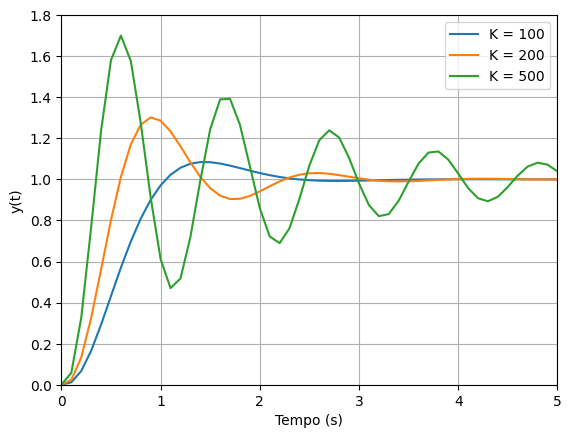

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl  # Biblioteca correta

# Definindo os valores de K, numeradores e denominadores
K = np.array([50, 100, 200, 500])
numg = np.array([1])
deng = np.array([1, 15, 50, 0])

# Definindo o vetor de tempo
t = np.arange(0, 5+0.1, 0.1)

# Laço para gerar as respostas para diferentes valores de K
for i in range(1, 4):  # Usando o range correto, sem reshape
    # Criando as funções de transferência em série e com feedback
    function1 = ctl.series(ctl.TransferFunction([K[i]], [1]), ctl.TransferFunction(numg, deng))
    function2 = ctl.feedback(function1)

    # Obtendo a resposta ao degrau
    t_out, y_out = ctl.step_response(function2, T=t)

    # Plotando os resultados
    plt.plot(t_out, y_out, label=f'K = {K[i]}')

# Configurações do gráfico
plt.axis([0, 5, 0, 1.8])
plt.xlabel('Tempo (s)')
plt.ylabel('y(t)')
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/control/freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


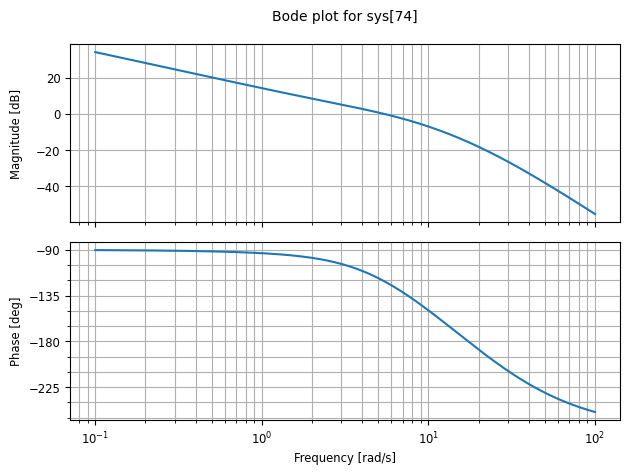

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

K = 1800
numg = np.array([1])
deng = np.array([1, 15, 50, 0])

# Definindo as funções de transferência para a planta e controlador
numgc = K * np.array([1, 3.5])
dengc = np.array([1, 25])

# Criando a função de transferência em série
function1 = ctl.series(ctl.TransferFunction(numgc, dengc), ctl.TransferFunction(numg, deng))

# Frequência para o gráfico de Bode
w = np.logspace(-1, 2, 200)

# Obtendo as respostas de magnitude e fase
mag, phase, _ = ctl.bode(function1, w, plot=True)

plt.show()


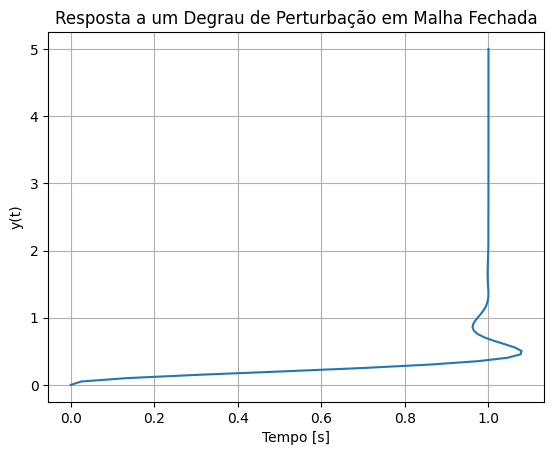

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

K = 1800
numg = np.array([1])
deng = np.array([1, 15, 50, 0])

# Definindo as funções de transferência para a planta e controlador
numgc = K * np.array([1, 3.5])
dengc = np.array([1, 25])

# Criando as funções de transferência em série
sys_gc = ctl.TransferFunction(numgc, dengc)
sys_g = ctl.TransferFunction(numg, deng)

# Sistema em malha aberta em série
function1 = ctl.series(sys_gc, sys_g)

# Sistema de malha fechada
function2 = ctl.feedback(function1)

# Calculando a resposta ao degrau
t = np.linspace(0, 5, 100)  # Definindo o vetor de tempo para a simulação
y, t_out = ctl.step_response(function2, t)

# Plotando a resposta ao degrau
plt.plot(t_out, y)
plt.title('Resposta a um Degrau de Perturbação em Malha Fechada')
plt.grid()
plt.xlabel('Tempo [s]')
plt.ylabel('y(t)')
plt.show()


/usr/local/lib/python3.11/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
<ipython-input-22-02e663e2492a>:24: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(wn ** 2 - xc ** 2)


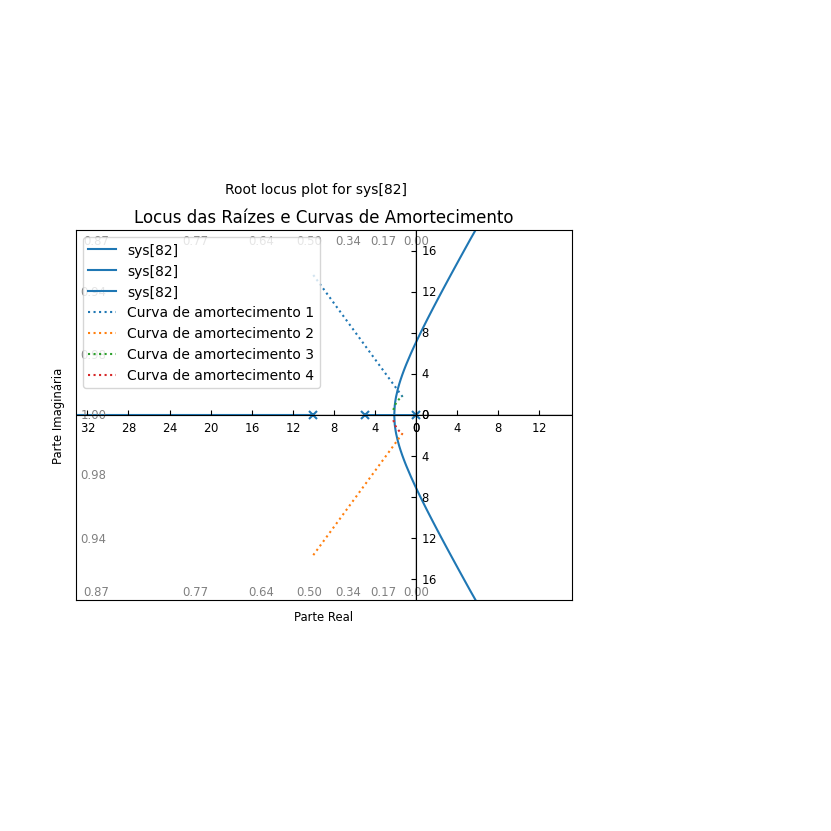

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo os coeficientes da função de transferência
numg = np.array([1])
deng = np.array([1, 15, 50, 0])

# Criando a função de transferência
sys = ctl.TransferFunction(numg, deng)

# Plotando o locus das raízes
plt.figure()
ctl.root_locus(sys, plot=True)

# Parâmetros de zeta e wn
zeta = 0.5912
wn = 2.2555

# Cálculo das curvas de amortecimento
x = np.arange(-10, -zeta * wn + 0.1, 0.1)
y = -(np.sqrt(1 - zeta ** 2) / zeta) * x
xc = np.arange(-10, -zeta * wn + 0.1, 0.1)
c = np.sqrt(wn ** 2 - xc ** 2)

# Plotando as curvas de amortecimento
plt.plot(x, y, ':', label='Curva de amortecimento 1')
plt.plot(x, -y, ':', label='Curva de amortecimento 2')
plt.plot(xc, c, ':', label='Curva de amortecimento 3')
plt.plot(xc, -c, ':', label='Curva de amortecimento 4')

# Configuração do gráfico
plt.grid()
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Locus das Raízes e Curvas de Amortecimento')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/control/rlocus.py:210: FutureWarning: root_locus() return value of roots, gains is deprecated; use root_locus_map()
  warnings.warn(
<ipython-input-23-a40e166d7ee1>:30: RuntimeWarning: invalid value encountered in sqrt
  c = np.sqrt(wn ** 2 - xc ** 2)


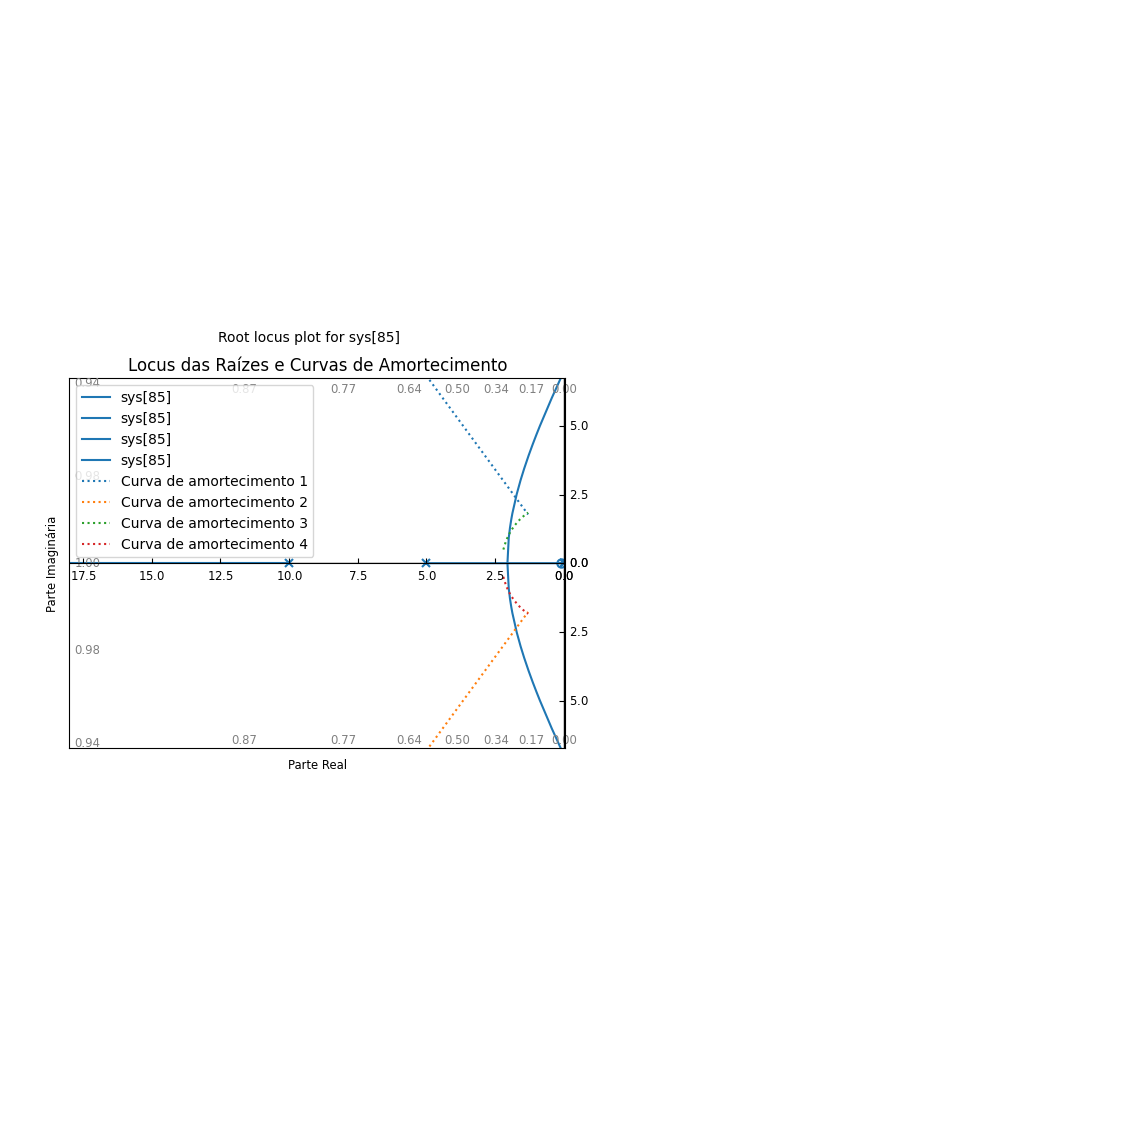

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Definindo os coeficientes das funções de transferência
numg = np.array([1])
deng = np.array([1, 15, 50, 0])
numgc = np.array([1, 0.1])
dengc = np.array([1, 0.01])

# Criando as funções de transferência
G = ctl.TransferFunction(numg, deng)
Gc = ctl.TransferFunction(numgc, dengc)

# Criando o sistema em série
function1 = ctl.series(Gc, G)

# Plotando o locus das raízes
plt.figure()
ctl.root_locus(function1, plot=True)

# Parâmetros para as curvas de amortecimento
zeta = 0.5912
wn = 2.2555

# Cálculo das curvas de amortecimento
x = np.arange(-10, -zeta * wn + 0.1, 0.1)
y = -(np.sqrt(1 - zeta ** 2) / zeta) * x
xc = np.arange(-10, -zeta * wn + 0.1, 0.1)
c = np.sqrt(wn ** 2 - xc ** 2)

# Plotando as curvas de amortecimento
plt.plot(x, y, ':', label='Curva de amortecimento 1')
plt.plot(x, -y, ':', label='Curva de amortecimento 2')
plt.plot(xc, c, ':', label='Curva de amortecimento 3')
plt.plot(xc, -c, ':', label='Curva de amortecimento 4')

# Configuração do gráfico
plt.grid()
plt.xlabel('Parte Real')
plt.ylabel('Parte Imaginária')
plt.title('Locus das Raízes e Curvas de Amortecimento')
plt.legend()
plt.show()


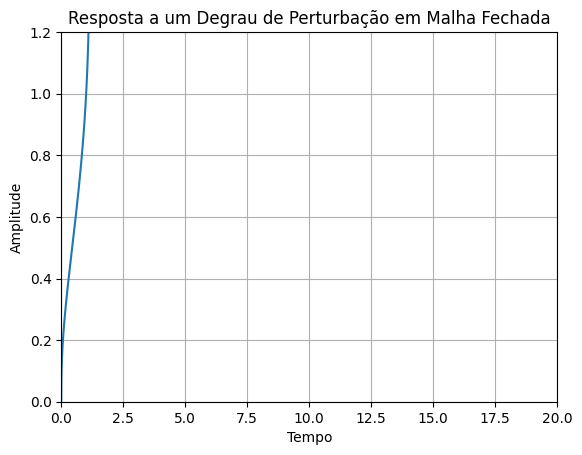

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

# Parâmetros do sistema
K = 100
numg = np.array([1])
deng = np.array([1, 15, 50, 0])
numgc = K * np.array([1, 0.1])
dengc = np.array([1, 0.01])

# Criando as funções de transferência
G = ctl.TransferFunction(numg, deng)
Gc = ctl.TransferFunction(numgc, dengc)

# Criando o sistema em série
function1 = ctl.series(Gc, G)

# Criando a malha fechada
function2 = ctl.feedback(function1)

# Obtendo a resposta ao degrau
t = np.linspace(0, 20, 1000)
y, t_out = ctl.step_response(function2, t)

# Plotando a resposta ao degrau
plt.grid()
plt.axis([0, 20, 0, 1.2])
plt.plot(t_out, y)
plt.title('Resposta a um Degrau de Perturbação em Malha Fechada')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')
plt.show()


##10.15 Exemplo de projeto sequencial: Sistema de leitura de acionador de disco

Será projetado um controlador proporcional e derivativo (PD) para se alcançar aresposta especificada para uma entrada em degrau unitário.Com as especificações na tabela abaixo
<center><b>TABELA 10.6 Especificações do Sistema de Controle de Acionador de Disco e
Desempenho Real</b></center>
$$
\begin{array}{lll}
  \hline
  \text{Medida de Desempenho} & \text{Valor Desejado }   &\text{Resposta Real}\\
  \hline
  \text{Ultrapassagem percentual} & \text{Inferior a 5%}   &\text{ 0,1%}\\
  \text{Tempo de assentamento} &\text{Inferior a 150 ms }&\text{ 40 ms}\\
  \text{Resposta máxima para uma
perturbação unitária} & \text{Inferior }5 \times 10^{-3} & 6,9 \times 10^{-5}\\
\hline
\end{array}
$$ Um filtro prévio é usado para eliminar quaisquer efeitos indesejáveis do termo (s + z) introduzido na função de transferência a malha fechada.
$$T(s) =\frac{\omega_n^2}{s^2 +\alpha\omega_ns + \omega_n^2}$$
Como queremos um tempo de assentamento > 50 ms, será usado o valor $\omega_n = 120$. Esperase assim T, = 40 ms.
$$s^2 + 218,4s + 14400$$
Possuindo o sistema de malha fechada
$$s^2 + (20 + 5K_3)s + 5K_1 =0$$
O modelo despreza o campo do motor e satisfaz as especificações

## Capítulo 13: Sistemas de controle digital

##13.1 Introdução


Atualmente os computadores são programados para poder realizar cálculos matematicos de forma que obtenham resultados digitais o mais próximo possível ao que o projetista planejou, sendo capazes de receber inúmeras entradas e se transformando em um sistema multivariável.
Um **sistema de controle digital** usa a seu favor os computadores para poder controlar os processos, onde os dados são convertidos com um conversor analógico-digital para poderem ser processados e assim obter uma saída digital.

##13.2 Aplicações de sistemas de controle com computador digital

São várias as aplicações dos sistemas de controle com computadores digitais, e como exemplo dessas aplicações, temos o uso desses sistemas em máquinas, processos de usinagem, químicos, de controle de tráfego, entre outros.

Um bom exemplo do uso de sistemas de controle digitais está na indústria aeonáutica: em um avião, diversos são os sistemas que são controlados por computadores. Como exemplo, temos sistemas de monitoração dos motores, sistemas de alerta à tripulação, indicador eletrônico de altitude, piloto automático, entre muitos outros.

Utilizar sistemas de controle digitais traz como consequência várias vantagens, dentre as quais podemos citar: um aumento na sensibilidade da medição do sistema; o uso de sinais digitalmente codificados; a possibilidade de utilização de sensores digitais, transdutores digitais e até mesmo microprocessadores; a redução dos ruídos que interferem na leitura dos sinais; entre outros.

##13.3 Sistemas com dados amostrados

Os computadores digitais usados em sistemas de controle interagem com o meio a partir de atuadores, e portanto, a estes são interligados de alguma forma. Esta interligação dá-se pelo uso de um conversor digital analógico.

Os sinais que entram em um computador passam por um processo de discretização, onde são extraídas amostras do sinal analógico do mundo real, em instantes fixos de tempo $T$ (chamado de período de amostragem). Esse processo converte um sinal contínuo no tempo em um sinal discreto. Como os sinais analógicos são contínuos, então, quando queremos fazer com que os sinais deixem um computador, necessitamos de um conversor digital analógico, que reconstitui o sinal e o externaliza, através de um atuador.

As amostras de sinais obtidas durante o período de amostragem são coletadas através de um amostrador, que se comporta, basicamente, como uma chave que se fecha a cada $T$ segundos por um breve instante de tempo.

O conversor digital-analógico converte o sinal amostrado em um sinal contínuo no tempo, e a precisão do computador digital e desses conversores é limitada. Portanto, todo sinal convertido possui um erro de quantização de amplitude, dado pelo conversor, e um erro dada pelo comprimento da palavra finito, dado pelo computador. Quando esses dois erros são pequenos em relação à amplitude do sinal, o sistema é suficientemente preciso, e suas limitações podem ser desprezadas.

##13.4 Transformada $Z$

A saída de um amostrador ideal é uma série de impulsos com valores $r(kT)$ (sequência de valores das amostras), e dá-se por:

$$
r\text{*}(t) = \Sigma_{k=0}^\infty r(kT)e^{-ksT}\text{,}
$$

para um sinal para $t > 0$. Usando a transformada de Laplace, tem-se:

$$
\
\mathscr{L}\{r\text{*}(t)\} = \Sigma_{k=0}^\infty r(kT)e^{-ksT}\text{.}
$$

Tem-se agora uma série que envolve o fator $e^{sT}$ e suas potências. Define-se

$$
\fbox{$\displaystyle z=e^{sT}\text{,}$}
$$

onde esta relação envolve um mapeamento conforme do plano $s$ no plano $z$. Define-se então uma nova transformada, chamada transformada $z$, tal que

$$
Z\{r(t)\} = Z\{r\text{*}(t)\} = \Sigma_{k=0}^\infty r(kT)z^{-k}\text{.}
$$

##13.5 Sistemas com retroação a malha fechada com dados amostrados

Nesta seção serão considerados os sistemas de controle a malha fechada, com dados amostrados. Considere-se o sistema mostrado na figura a seguir:

![picture](https://drive.google.com/uc?export=view&id=1sDZVqx8P1geCCnMFfd-brjq4b-qyvTRF)

A próxima figura mostra o modelo em transformada $z$ deste sistema com um sinal amostrado de saída $Y(z)$:

![picture](https://drive.google.com/uc?export=view&id=1HmboyGbWOXvN4EYqGV97It0GWn-SQdZ3)

A função de transferência a malha fechada $T(z)$ (usando a redução de diagrama de blocos) é:

$$
\frac{Y(z)}{R(z)} = T(z) = \frac{G(z)}{1 + G(z)} \text{.}
$$

Um sistema de controle com retroação com computador digital está mostrado na figura a seguir:

![picture](https://drive.google.com/uc?export=view&id=1TMvBH1jTaDKYrSJXT22-fcaJdQ0_E6FH)

O modelo de transformada da figura acima $z$ em diagrama de blocos é:

![picture](https://drive.google.com/uc?export=view&id=1SS1D8JWoUYNMSttOwTwiFZhGHxa9ICT_)

A função de transferência a malha fechada é:

$$
\fbox{$\displaystyle \frac{Y(z)}{R(z)} = T(z) = \frac{G(z)D(z)}{1+G(z)D(z)} \text{.}$}
$$

##13.6 Análise de estabilidade no plano $Z$

Um sistema de controle com retroação linear e contínuo no tempo é estável se todos os pólos da função de transferência a malha fechada $T(s)$ estiverem no semiplano $s$ da esquerda. O plano $x$ se relaciona com o plano $s$ através da transformação:

$$
z = e^{sT} = e^{(\sigma + j\omega)T} \text{.}
$$

Pode-se escrever esta relação como:

$$
|z| = e^{\sigma T}
$$

e

$$
\angle z = \omega T
$$

No semiplano $s$ da esquerda, $\sigma < 0$, e portanto a magnitude de $z$ varia entre 0 e 1. Portanto, o eixo imaginário do plano $s$ corresponde ao círculo unitário corresponde ao semiplano $s$ da esquerda.
Pode-se enunciar, em consequência, que um sistema amostrado é estável se todos os pólos da função de transferência a malha fechada $T(z)$ estiverem situados no interior do círculo unitário do plano $z$.

##13.7  Desempenho de um sistema de segunda ordem com dados amostrados

Considere-se o desempenho de um sistema de segunda ordem amostrado com um extrapolador de ordem zero, quando o processo a controlar é:

$$
G_p(s) = \frac{K}{s(\tau s + 1)} \text{.}
$$

Obtém-se, então, $G(z)$ para um valor não especificado do período de amostragem T:

$$
G(z) = \frac{K\{(z - E)[T - \tau(z - 1)] + \tau(z - 1)^2\}}{(z - 1)(z - E)} \text{,}
$$

onde $E = e^{-T/\tau}$. A estabilidade do sistema é analisada considerando-se a equação característica

$$
q(z) = z^2 + z\{K[T - \tau(1 - E)] - (1 + E)\} + K[\tau(1 - E) - TE] + E = 0 \text{.}
$$

Como o o polinômio $q(z)$ é do segundo grau e tem todos os coeficientes reais, as condições necessárias e suficientes para ter todas as raízes no inteiror do círculo unitário são

$$
|q(0)| < 1, \ \ \ \ \ \ \ q(1) > 0, \ \ \ \ \ \ \ q(-1) > 0 \text{.}
$$

Estas condições de estabilidade para um sistema de segunda ordem podem ser estabelecidas mapeando-se a equação característica do plano $z$ no plano $s$ e verificando se os coeficientes de $q(s)$ são positivos. Usando-se estsas condições, estabelecem-se:

$$
K \tau < \frac{1 - E}{1 - E - (T/\tau)E} \text{,}
$$

$$
K \tau < \frac{2(1 + E)}{(T/\tau)(1 + E) - 2(1 - E)} \text{,}
$$

e $K > 0, T > 0$. Para este sistema é possível calcular o valor máximo de ganho permissível para se ter um sistema estável.

##13.8 Sistemas a malha fechada com compensação digital por computador

Um sistema amostrado, a malha fechada, com um computador digital usado para melhorar o desempenho, tem sua função de transferência dada por:

$$
\frac{Y(z)}{R(z)} = T(z) = \frac{G(z)D(z)}{1 + G(z)D(z)} \text{.}
$$

A função de transferência do computador é representada por

$$
\frac{U(z)}{E(z)} = D(z) \text{.}
$$

Nos cálculos anteriores, $D(z)$ foi representado simplesmente por um ganho $K$. Como ilustração potência do computador como compensador, será reconsiderado o sistema de segunda ordem com um extrapolador de ordem zero e um processo a controlar

$$
G_p(s) = \frac{1}{s(s + 1)} \text{ quando } T = 1 \text{.}
$$

Então

$$
G(z) = \frac{0,3678(z + 0,7189)}{(z - 1)(z - 0,3678)} \text{.}
$$

Se for selecionado

$$
D(z) = \frac{K(z - 0,3678)}{(z + r)} \text{,}
$$

cancela-se o pólo de $G(z)$ em $z = 0,3678$ e há dois parâmetros, $r$ e $K$, para determinar. Escolhendo-se

$$
D(z) = \frac{1,359(z - 0,3678)}{(z + 0,240)} \text{,}
$$

tem-se

$$
G(z)D(z) = \frac{0,50(z + 0,7189)}{(z - 1)(z + 0,240)} \text{.}
$$

Considere-se um compensador de primeira ordem

$$
G_c(s) = K \frac{s + a}{s + b}
$$

e um **controlador digital**

$$
\fbox{$\displaystyle D(z) = C \frac{z - A}{z - B} \text{.}$}
$$

Determina-se a transformada $z$ de $G_c(s)$ e iguala-se esta transformada a D(z)

$$
Z\{G_c(s)\} = D(z) \text{.}
$$

Então a relação entre as duas funções de transferência é $A = e^{-aT}, B = e^{-bT}$ e, quando $s = 0$,

$$
C \frac{(1 - A)}{(1 - B)} = K \frac{a}{b} \text{.}
$$

##13.9 Projeto de um sistema de controle do movimento de uma mesa transportadora

Em indústrias manufatureiras, um importante sistema de posicionamento é o sistema de controle do movimento de uma mesa transportadora. Tal sistema possui como finalidade realizar o controle do movimento de uma mesa, posicionando-a em alguma determinada posição.

Um exemplo de um sistema desse tipo está apresentado na figura abaixo:

![picture](https://drive.google.com/uc?export=view&id=1g8S7-MmObKifq6Sfn8v92L5jcuiMVy0K)

Esse sistema, através de um motor e um parafuso sem fim, controla o movimento da mesa ao longo do eixo $x$. Além disso, o sistema possui retroação e um computador.

O objetivo é obter uma resposta rápida, para um comando em degrau, com tempos de subida e de assentamento pequenos sem exceder uma ultrapassagem de 5%, dadas as seguintes especificações:

1. Ultrapassagem percentual igual a 5%
2. Tempo de assentamento (critério dos 2%) e tempo de subida ($T_R$) mínimos.

Inicialmente, para configurarmos o sistema, escolhemos um amplificador de potência e o motor, de tal forma que o sistema seja o descrito pela figura a seguir:

![picture](https://drive.google.com/uc?export=view&id=1wsKqfi9975hROQYUjrrGyCCQjPUXJWpX)

Obtendo a função de transferência do amplificador de potência e do motor, temos:

$$
G_p(s) = \frac{1}{s(s + 10)(s + 20)} \text{.}
$$

Inicialmente, utilizamos um sistema contínuo e projetado ($G_c(s)$), onde, a partir dele, obtemos $D(z)$.

O controlador escolhido tem como objetivo determinar a resposta que pode ser obtida sem um compensador, e possui um simples ganho $K$. Quando traçamos o lugar das raízes, descobre-se que, para $K = 700$, as raízes complexas dominantes apresentam uma relação de amortecimento de 0,707, e se espera uma ultrapassagem de 5%. Descobrindo os outros valores, temos a tabela a seguir:

<center><b>TABELA 13.4 Desempenho de Dois Controladores</b></center>

$$
\begin{array}{lllll}
\hline
\text{Compensador } G_c(s) & K & \text{Ultrapassagem Percentual} & \text{Tempo de assentamento (segundos)} & \text{Tempo de Subida (segundos)}\\
\hline
\text{1. } K & 700 & 5,0 & 1,12 & 0,40\\
\text{2. } K(s + 11)/(s + 62) & 8000 & 5,0 & 0,60 & 0,25\\
\hline
\end{array}
$$

Como a segunda opção de valores da tabela fornece uma resposta melhorada ao sistema, então este será o sistema aceitável.

Desta forma, escolhendo o período de amostragem e usando o método da seção 13.8, obtemos $D(z)$. Para isto, tem-se:

$$
G_c(s) = \frac{8000(s + 11)}{(s + 62)} \text{.}
$$

Então

$$
D(z) = C \frac{z - A}{z - B} \text{,}
$$

onde

$$A = e^{-11T} = 0,8958 \text{,} \ \ \ \ \ \text{e} \ \ \ \ \  B = e^{-62T} = 0,5379\text{.}$$

Tem-se, agora,

$$
C = K \frac{a(1 - B)}{b(1 - A)} = \frac{8000(11)(0,462)}{62(0,1042} = 6293 \text{.}
$$

##13.10 O lugar das raízes de sistemas com controle digital

![picture](https://drive.google.com/uc?export=view&id=1YSYvJtYMfFP3RZkSo7I9nOksx5Km3dEm)

Considerando o sistema acima, sua função de transferência a malha fechada é:

$$
\frac{Y(z)}{R(z)} = \frac{KG(z)D(z)}{1 + KG(z)D(z)} \text{.}
$$

Desta forma, lembrando que $G(s) = G_0(s)G_p(s)$, a equação característica do sistema é:

$$
1 + KG(z)D(z) = 0 \text{,}
$$

que é análoga à equação característica para a análise de $KG(s)$, no plano $s$. Como uma consequência disto, podemos traçar o lugar das raízes da equação característica do sistma amostrado em função da variação de $K$, seguindo as seguintes regras:

  1. O lugar das raízes começa nos pólos e prossegue em direção aos zeros.
  2. O lugar das raízes existe nos trechos do eixo real à esquerda de um número ímpar de pólos e zeros.
  3. O lugar das raízes é simétrico com relação ao eixo real horizontal.
  4. O lugar das raízes pode deixar o eixo real e reentrar no eixo real. Os pontos de saída e de entrada são determinados a partir da equação

$$
K = - \frac{N(z)}{D(z)} = F(z) \text{,}
$$

$\ \ \ \ \ \ \ \ $onde $z = \sigma$. Obter, então, a solução de $\frac{dF(\sigma)}{d\sigma} = 0 \text{.}$

5. Traçar o lugar das raízes que satisfazem

$$
1 + KG(z)D(z) = 0
$$

$\ \ \ \ \ \ \ \ $ou

$$
|KG(z)D(z)| = 1
$$

$\ \ \ \ \ \ \ \ $e

$$
\angle{G(z)D(z)} = 180° \pm k360° \text{,} \ \ \ \ \ k = 0, 1, 2, \dots
$$

##13.11 Implementação de controladores digitais

Considere o controlador PID com a seguinte função de transferência no domínio $s$:

$$
\frac{U(s)}{X(s)} = G_c(s) = K_1 + \frac{K_2}{s} + K_3s \text{.}\
$$

Podemos usar uma aproximação discreta para a derivada e para a integração para determinar uma implementação digital desse controlador.

Para derivar em relação ao tempo, usamos a **regra da diferença atrasada**:

$$
\begin{array}{l|l}
  u(kT) = {\frac{dx}{dt}} & _{_{_{t=kT}}} = \frac{1}{T}(x(kT) - x[(k - 1)T]) \text{.}
\end{array}
$$

A partir disto, a transformada $z$ da equação acima é, então:

$$
U(z) = \frac{(1 - z^{-1})}{T} X(z) = \frac{(z - 1)}{Tz} X(z) \text{.}
$$

Já para integrar $x(t)$, usamos a **regra da integração retangular avançada** em $t = kT$:

$$
u(kT) = u[(k - 1)T] + Tx(kT) \text{,}
$$

onde $u(kT)$ é a saída do integrador em $t = kT$. A partir disto, a transformada $z$ da equação acima é, então:

$$
U(z) = z^{-1}U(z) + TX(z) \text{.}
$$

Desta forma, a função de transferência é:

$$
\frac{U(z)}{X(z)} = \frac{Tz}{(z - 1)} \text{,}
$$

e a função de transferência no domínio $z$ do **controlador PID** é:

$$
G_c(z) = K_1 + \frac{K_2Tz}{(z - 1)} + K_3 \frac{(z - 1)}{Tz} \text{.}
$$

##13.12 Sistemas de controle digital usando Matlab

In [ ]:
import numpy as np
import control as ctl

# Função de transferência contínua
num = [1]
den = [1, 1, 0]
T = 1

# Sistema contínuo
sysc = ctl.TransferFunction(num, den)

# Discretizando o sistema contínuo com método ZOH
sysd = ctl.c2d(sysc, T, method="zoh")

# Exibindo o sistema discreto
print(sysd)


<TransferFunction>: sys[92]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


  0.3679 z + 0.2642
----------------------
z^2 - 1.368 z + 0.3679

dt = 1



###**EXEMPLO Resposta do degrau unitário**

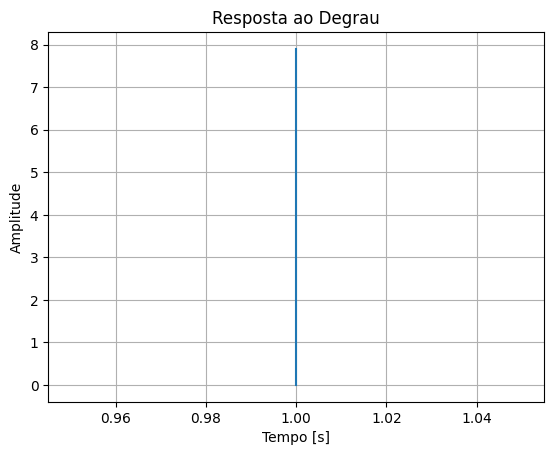

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo a função de transferência
num = [0.3678 + 0.2644]  # Corrigido
den = [1 - 1 + 0.6322]  # Corrigido

sys = ctl.TransferFunction(num, den)

# Definindo o intervalo de tempo para a resposta
T = np.arange(0, 8, 0.1)

# Calculando a resposta ao degrau
yout, T_out = ctl.step_response(sys, T)

# Plotando a resposta
plt.plot(T_out, yout)
plt.title('Resposta ao Degrau')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


1 states have been removed from the model


<ipython-input-27-3a5541efbe04>:35: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='')


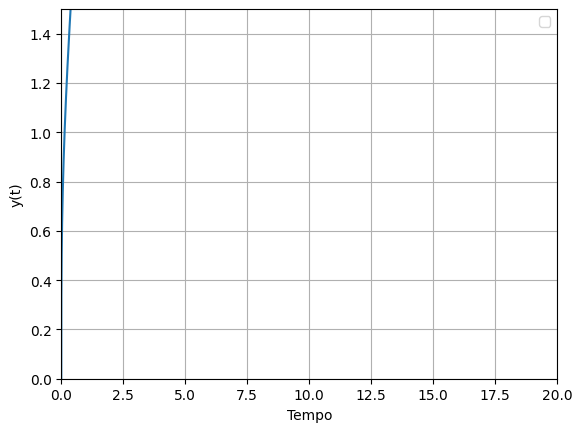

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt
from control import pade, minreal

# Definindo a função de transferência do sistema contínuo
numg = np.array([1])
deng = np.array([1, 1, 0])

# Aproximação de Pade de ordem 2 para a função de transferência
nd, dd = pade(1, 2)

# Criando a função de transferência discretizada
numd = np.array(dd) - np.array(nd)
dend = np.convolve(np.array([1, 0]), dd)

# Aplicando a minimização de ordem (minreal)
function1 = minreal(ctl.TransferFunction(numd, dend))

# Criando o sistema em série com a função de transferência 'function1'
function2 = ctl.series(function1, ctl.TransferFunction(numg, deng))

# Adicionando a retroalimentação
lastfunction = ctl.feedback(function2)

# Obtendo a resposta ao degrau
y, t = ctl.step_response(lastfunction)

# Plotando o gráfico
plt.grid()
plt.xlabel("Tempo")
plt.ylabel("y(t)")
plt.axis([0, 20, 0, 1.5])
plt.plot(t, y)  # Troquei y,t por t,y, para que o gráfico seja correto
plt.legend(title='')
plt.show()


###**EXEMPLO Lugar das raízes de um sistema de controle digital**

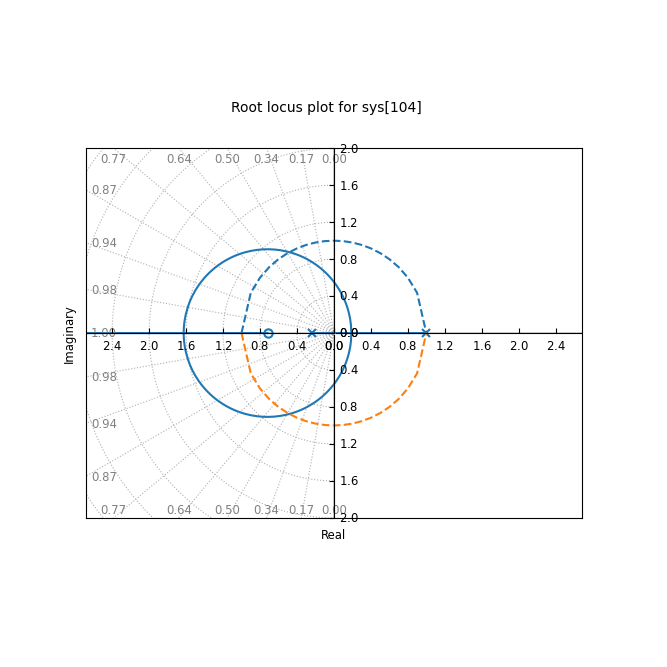

In [ ]:
import numpy as np
import control as ctl
import matplotlib.pyplot as plt

# Definindo a função de transferência
num = np.array([0.3678, 0.2644])
den = np.array([1.0, -0.76, -0.24])

# Gerando o gráfico de local de raízes
system = ctl.TransferFunction(num, den)
ctl.rlocus(system, xlim=[-2, 2], ylim=[-2, 2])  # Ajustei os limites para o valor de 'number'

# Adicionando os círculos de margens
x = np.arange(-1, 1.1, 0.1)
ones = np.ones(len(x))
y = np.sqrt(ones - x ** 2)

plt.plot(x, y, '--', x, -y, '--')
plt.show()


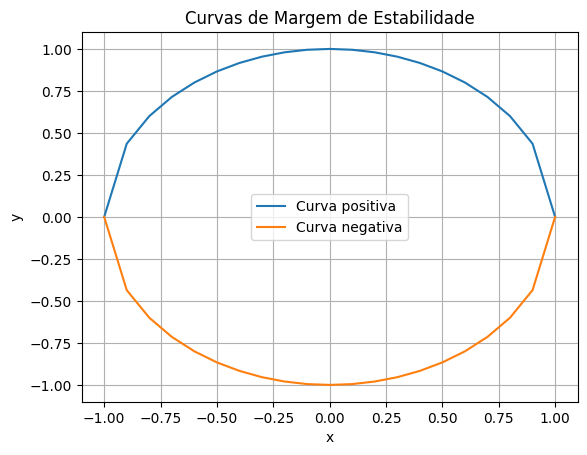

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Definindo os valores de x
x = np.arange(-1, 1.1, 0.1)
s = len(x)
o = np.ones(s)

# Calculando y
y = []
for i in range(len(x)):
    y.append(math.sqrt(o[i] - (x[i]**2)))

# Plotando a primeira curva
plt.plot(x, y, label='Curva positiva')

# Alterando os valores de y para o lado negativo
y = [-val for val in y]

# Plotando a segunda curva
plt.plot(x, y, label='Curva negativa')

# Exibindo o gráfico
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Curvas de Margem de Estabilidade")
plt.grid(True)
plt.show()


##13.13 Exemplo de projeto sequencial: sistema de leitura de acionador de disco

Será projetado um controlador digital para o sistema de acionador de disco.

Como o disco gira, a cabeça do sensor lê o código usado para se dispor da informação de erro de referência. Esta informação de erro codificado é lida internamente à medida que a cabeça de leitura armazena os dados, e por sua vez o código. Como o disco está girando com uma velocidade constante, o tempo, T, entre leituras de erro de posição é constante. Este período de amostragem possui um valor típico entre 100 $\mu$s e 1 ms. Portanto, a informação do erro foi amostrada. Pode-se utilizar também um controlador digital para obter uma resposta do sistema que seja satisfatória. Nesta seção, será projetado $D(z)$.

Determina-se inicialmente $G(z)$, onde

$$
G(z) = Z[G_0(s)G_p(s)] \text{.}
$$

Como

$$
G_p(s) = \frac{5}{s(s + 20)} \text{,}
$$

tem-se

$$
G_0(s)G_p(s) = \left (\frac{1 - e^{-sT}}{s}\right ) \frac{5}{s(s + 20)}
$$

Constata-se que para $a$ = 20 e $T$ = 1 ms, $e^{-aT}$ é igual a 0,98. Percebe-se então que o pólo em $s = -20$ possui um efeito insignificante. Portanto, é possível aproximar $G_p(s)$ por:

$$
G_p(s) \approx \frac{0,25}{s} \text{.}
$$

Necessita-se, então,

$$
\begin{array}{rl}
G(z) = & Z\left [\frac{1 - e^{-sT}}{s}\left (\frac{0,25}{s}\right )\right ] \\
= & (1 - z^{-1})(0,25)Z\left [\frac{1}{s^2}\right ] \\
= & (1 - z)(0,25) \left (\frac{Tz}{(z - 1)^2}\right )\\
= & \frac{0,25T}{(z - 1)} = \frac{0,25 \times 10^{-3}}{(z - 1)} \text{.}
\end{array}
$$

É necessário selecionar o controlador digital $D(z)$ de modo que seja alcançada a resposta desejada para uma entrada em degrau. Fazendo-se $D(z) = K$, tem-se então

$$
D(z)G(z) = \frac{K(0,25 \times 10^{-3}}{(z - 1)} \text{.}
$$

Quando $K = 4000$, então

$$
D(z)G(z) = \frac{1}{(z - 1)} \text{.}
$$

Portanto, a função de transferência a malha fechada é

$$
T(z) = \frac{D(z)G(z)}{1 + D(z)G(z)} = \frac{1}{z} \text{.}
$$

Espera-se que o sistema apresente uma resposta rápida. A ultrapassagem percentual para uma entrada em degrau é 0% e o tempo de assentamento é de 2 ms.